<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Вячеслав! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>

# Проект: Линейные модели в машинном обучении

**Цель проекта:** разработать модель машинного обучения, которая поможет фермеру управлять рисками и принимать объективное решение о покупке новых коров для своего стада.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:



Введение можно написать побольше


## Загрузка данных

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score  

df1 = pd.read_csv('/datasets/ferma_main.csv', sep=';')
df2 = pd.read_csv('/datasets/ferma_dad.csv', sep=';')
df3 = pd.read_csv('/datasets/cow_buy.csv', sep=';')

display(df1)
display(df1.info())
display(df2)
display(df2.info())
display(df3)
display(df3.info())

,id,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
0,1,5863,"14,2",1743,"0,89",Вис Бик Айдиал,Равнинное,Айдиал,"3,58","3,076",вкусно,более_2_лет
1,2,5529,"12,8",2138,"0,89",Вис Бик Айдиал,Равнинные,Соверин,"3,54","3,079",вкусно,менее_2_лет
2,3,5810,14,1854,"0,885",РефлешнСоверинг,Холмистое,Соверин,"3,59","3,074",не вкусно,более_2_лет
3,4,5895,"12,4",2012,"0,885",РефлешнСоверинг,Холмистое,Айдиал,"3,4","3,075",не вкусно,более_2_лет
4,5,5302,"12,8",1675,"0,885",Вис Бик Айдиал,Равнинные,Соверин,"3,73","3,073",вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
629,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
630,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
631,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет
632,627,5970,"14,4",1837,"0,88",РефлешнСоверинг,Холмистое,Соверин,"3,64","3,075",не вкусно,более_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   id                                     634 non-null    int64 
 1   Удой, кг                               634 non-null    int64 
 2   ЭКЕ (Энергетическая кормовая единица)  634 non-null    object
 3   Сырой протеин, г                       634 non-null    int64 
 4   СПО (Сахаро-протеиновое соотношение)   634 non-null    object
 5   Порода                                 634 non-null    object
 6   Тип пастбища                           634 non-null    object
 7   порода папы_быка                       634 non-null    object
 8   Жирность,%                             634 non-null    object
 9   Белок,%                                634 non-null    object
 10  Вкус молока                            634 non-null    object
 11  Возраст            

None

,id,Имя Папы
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
...,...,...
624,625,Буйный
625,626,Барин
626,627,Барин
627,628,Барин


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   Имя Папы  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,"3,63","3,053",менее_2_лет
6,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
7,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,57","3,079",более_2_лет
8,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
9,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,079",менее_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Порода                   20 non-null     object
 1   Тип пастбища             20 non-null     object
 2   порода папы_быка         20 non-null     object
 3   Имя_папы                 20 non-null     object
 4   Текущая_жирность,%       20 non-null     object
 5   Текущий_уровень_белок,%  20 non-null     object
 6   Возраст                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


None


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет:

    
    
- всё-таки стоит импорт библиотек и выгрузку данных разнести в разные ячейки, так будет стилистически правильно     


    
- есть рекомендации PEP-8 при написании кода, в том числе и для импортов. Если интересно можешь почитать [тут](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html). Есть что поправить 




<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

    
Ошибка:    
    

Не забываем указать decimal . Сразу после чтения файла, убеждаемся что данные прочитаны верно, если нет, сразу вносим корректировки в чтение, иначе у нас неопределён верный тип данных, и многие методы и функции корректно не отработают
    
    

<div class="alert alert-warning">



Совет 🤔:
    
    
- Ещё есть такой интересный аргумент при чтении как  parse_dates - позволяет указать какие столбцы в DataFrame содержат даты и время. Как раз для этого проекта. Если у нас установлен верный тип данных, это значит что мы можем легко вытасиквать информацию о годе, месяце, дня, времени, можем вычитать, прибавлять из столбца с датами другой столбец с датами, получая осмысленную информацию
    
Для будущих проектов пригодится       

##  Предобработка данных

Рассмотрим первый датафрейм `df1`: 

* переименуем столбцы в корректную форму;
* проверим данные на наличие полных дубликатов, удалим их;
* пропуски в данных отсутствуют;
* изменим тип данных там, где это необходимо;
* исправим неявные дубликаты в столбце `pasture_type`.



In [2]:
df1.rename(columns={'Удой, кг': 'milk_kg', 'ЭКЕ (Энергетическая кормовая единица)': 'efu', \
                   'Сырой протеин, г': 'protein_g', 'СПО (Сахаро-протеиновое соотношение)': 'sp_ratio', \
                   'Порода': 'breed', 'Тип пастбища': 'pasture_type', 'порода папы_быка': 'daddy_breed', \
                   'Жирность,%': 'fats_%', 'Белок,%': 'proteins_%', 'Вкус молока': 'taste_milk', \
                   'Возраст': 'age'}, inplace=True)

#удаляем дубликаты
print('Количество дубликатов:', df1.duplicated().sum())
df1.drop_duplicates(inplace=True)

#функция замены ',' на '.', перевода в формат 'float', исправления неявных дубликатов 'pasture_type'
def change_symbol(row):
    try:
        for col in ['efu', 'sp_ratio', 'fats_%', 'proteins_%']:
            row[col] = float(row[col].replace(',', '.'))
    except KeyError:
        for col in ['fats_%', 'proteins_%']:
            row[col] = float(row[col].replace(',', '.'))
    if row['pasture_type'] == 'Равнинные':
        row['pasture_type'] = row['pasture_type'].replace('Равнинные', 'Равнинное')
    if row['daddy_breed'] == 'Айдиалл':
        row['daddy_breed'] = row['daddy_breed'].replace('Айдиалл', 'Айдиал')
    return row

df1 = df1.apply(change_symbol, axis=1)

display(df1)
display(df1.info())

Количество дубликатов: 5


,id,milk_kg,efu,protein_g,sp_ratio,breed,pasture_type,daddy_breed,fats_%,proteins_%,taste_milk,age
0,1,5863,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,вкусно,более_2_лет
1,2,5529,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,вкусно,менее_2_лет
2,3,5810,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,не вкусно,более_2_лет
3,4,5895,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,не вкусно,более_2_лет
4,5,5302,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,вкусно,менее_2_лет
...,...,...,...,...,...,...,...,...,...,...,...,...
624,625,6812,15.4,1964,0.940,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,не вкусно,более_2_лет
625,626,5513,12.9,1700,0.880,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,вкусно,менее_2_лет
626,627,5970,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,не вкусно,более_2_лет
627,628,5746,13.8,1994,0.890,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,вкусно,более_2_лет


<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            629 non-null    int64  
 1   milk_kg       629 non-null    int64  
 2   efu           629 non-null    float64
 3   protein_g     629 non-null    int64  
 4   sp_ratio      629 non-null    float64
 5   breed         629 non-null    object 
 6   pasture_type  629 non-null    object 
 7   daddy_breed   629 non-null    object 
 8   fats_%        629 non-null    float64
 9   proteins_%    629 non-null    float64
 10  taste_milk    629 non-null    object 
 11  age           629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 63.9+ KB


None




<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

👍 помнишь о стилистике


Молодец что используешь rename,  чтобы не думать о порядке. 


    
<div class="alert alert-warning">


Совет 🤔:
    
    
    
По поводу твоей функции которая работает со скрытыми дубликатами - она не универсальная, на один раз.  А такие действия в виде функции мы обычно не оформляем

Первый датафрейм готов к дальнейшей работе.

---

Рассмотрим второй датафрейм `df2`: 

* переименуем столбец `Имя Папы` в корректную форму;
* полные, неявные дубликаты, пропуски в данных отсутствуют.

In [3]:
df2.rename(columns={'Имя Папы': 'daddy_name'}, inplace=True)

print('Количество дубликатов:', df2.duplicated().sum())

display(df2)
display(df2.info())

Количество дубликатов: 0


,id,daddy_name
0,1,Буйный
1,2,Соловчик
2,3,Барин
3,4,Буйный
4,5,Барин
...,...,...
624,625,Буйный
625,626,Барин
626,627,Барин
627,628,Барин


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          629 non-null    int64 
 1   daddy_name  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


None

Второй датафрейм готов к дальнейшей работе.

---

Рассмотрим третий датафрейм `df3`: 

* переименуем столбцы в корректную форму;
* проверим данные на наличие полных дубликатов, удалим их;
* пропуски в данных отсутствуют;
* изменим тип данных там, где это необходимо;
* исправим неявные дубликаты в столбце `pasture_type`.

In [4]:
df3.rename(columns={'Порода': 'breed', 'Тип пастбища': 'pasture_type', 'порода папы_быка': 'daddy_breed', \
                   'Имя_папы': 'daddy_name', 'Текущая_жирность,%': 'fats_%', \
                   'Текущий_уровень_белок,%': 'proteins_%', 'Возраст': 'age'}, inplace=True)

df3 = df3.apply(change_symbol, axis=1)

print('Количество дубликатов:', df3.duplicated().sum())
df3.drop_duplicates(inplace=True, ignore_index=True)

display(df3)
display(df3.info())

Количество дубликатов: 4


,breed,pasture_type,daddy_breed,daddy_name,fats_%,proteins_%,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет
6,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет
7,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет
8,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет
9,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   breed         16 non-null     object 
 1   pasture_type  16 non-null     object 
 2   daddy_breed   16 non-null     object 
 3   daddy_name    16 non-null     object 
 4   fats_%        16 non-null     float64
 5   proteins_%    16 non-null     float64
 6   age           16 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.0+ KB


None

Третий датафрейм готов к дальнейшей работе.

---


### Промежуточный вывод:

Проверены все три датафрейма:

* переименованы столбцы в корректную форму;
* данные проверены на наличие полных дубликатов и очищены от них;
* пропуски в данных отсутствуют;
* тип данных изменён там, где это необходимо;
* исправлены неявные дубликаты.

---

## Исследовательский анализ данных

Анализ данных начнём с изучения параметров первого датафрейма. Необходимо проверить данные на наличие аномалий и выбросов. Построим гистограммы распределения: 

,milk_kg
count,629.00
mean,6188.75
median,6133.00
max,45616.00
min,5204.00


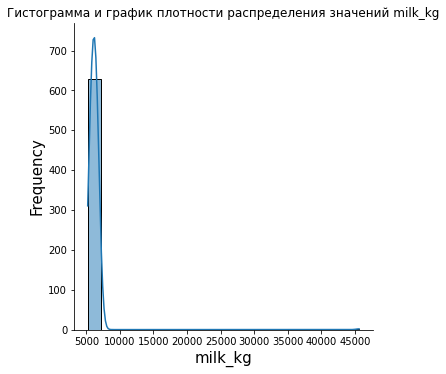

,efu
count,629.00
mean,14.54
median,14.70
max,16.80
min,10.90


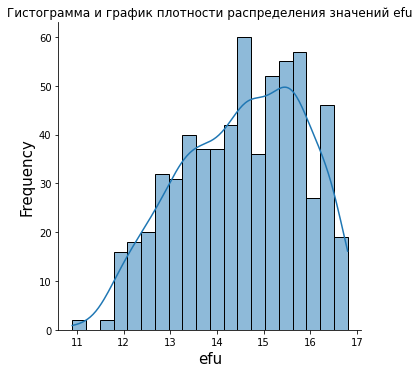

,protein_g
count,629.00
mean,1923.36
median,1888.00
max,2349.00
min,1660.00


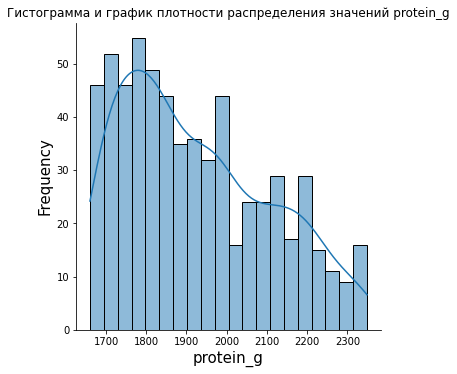

,sp_ratio
count,629.00
mean,0.91
median,0.93
max,0.96
min,0.84


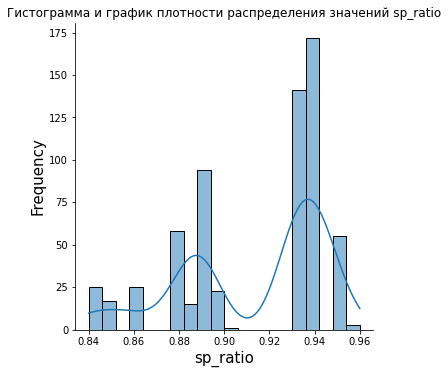

,fats_%
count,629.00
mean,3.60
median,3.65
max,3.75
min,2.99


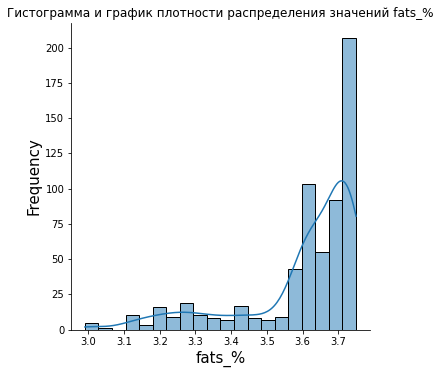

,proteins_%
count,629.00
mean,3.08
median,3.08
max,3.08
min,3.07


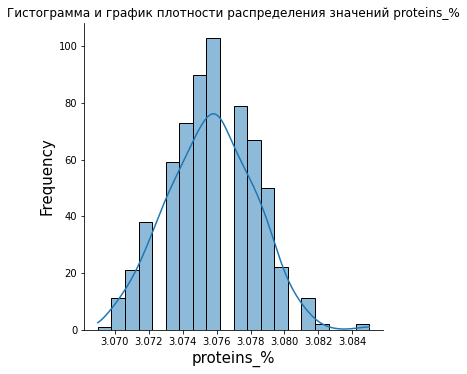

In [5]:
def histogram(data):
    for col in data.select_dtypes(include=['float64', 'int64']).columns:
        if col != 'id':
            display(round(df1[col].agg(['count', 'mean', 'median', 'max', 'min']), 2).to_frame())
            sns.displot(data[col], kde=True, multiple='stack', bins=20)
            plt.title('Гистограмма и график плотности распределения значений {}'.format(col))
            plt.xlabel(col, fontsize=15)
            plt.ylabel('Frequency', fontsize=15)
            plt.show()        


histogram(df1)



<div class="alert alert-danger">
<font size="5">
<b>Комментарий ревьюера</b></font>





Ошибка ❌:

Использование как гистограммы, так и ящика с усами в анализе колличественных данных предпочтительней, потому что каждый из них обладает своими уникальными преимуществами:

Гистограмма: Гистограмма позволяет вам визуально оценить форму распределения данных. Она особенно полезна для выявления бимодальности - наличия двух характерных мод в данных. Гистограмма позволяет увидеть, есть ли две выраженные вершины (пики) в данных, что может указывать на наличие двух различных групп в данных.

Ящик с усами (Boxplot): Ящик с усами отлично подходит для выявления выбросов и оценки разброса данных. Он обнаруживает асимметрии и позволяет оценить наличие выбросов, которые не всегда легко заметить на гистограмме.



<div class="alert alert-warning">


Совет 🤔:



- для красоты восприятия рекомендую использовать [subplots](https://nagornyy.me/it/vizualizatsiia-dannykh-v-matplotlib/):  Для каждого признака, в одном столбце график - гистограмма, в другом график - boxplot


- возможно будет удобно поработать с plt.rcParams из библиотеки matplotlib. Это настройки которые позволяют настраивать внешний вид графиков без необходимости указывать каждый параметр при каждом создании графика. Например можно указать универсальный размер шрифта подписей сразу для всех графиков в проекте
 


В столбце `milk_kg` обнаружено аномальное значение (45616). Предположительно, была допущена ошибка при вводе данных. Удалим данное значение.

В столбцах `efu`, `protein_g`, `sp_ratio`, `fats_%` наблюдаются локальные выбросы. Вероятно, это связано со спецификой состава молока и корма, т.к. общее распределение данных выглядит корректно.

В столбце `proteins_%` наблюдается нормальное распределение.

---

Во втором датафрейме количественных данных нет.

Рассмотрим третий датафрейм:

,fats_%
count,628.00
mean,3.60
median,3.65
max,3.75
min,2.99


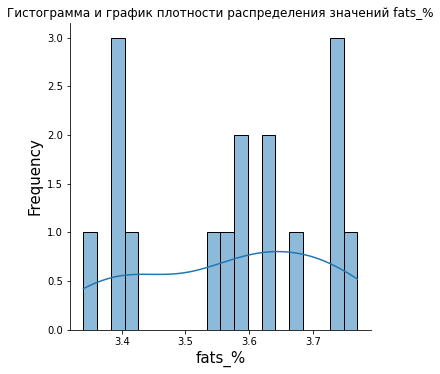

,proteins_%
count,628.00
mean,3.08
median,3.08
max,3.08
min,3.07


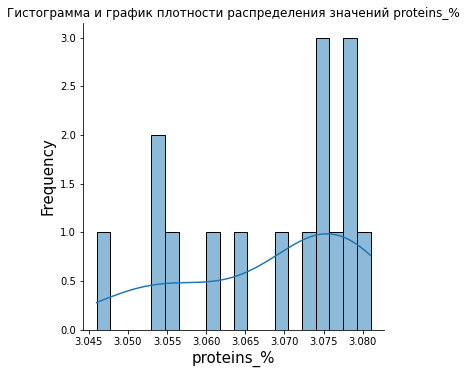

In [6]:
df1 = df1.query('milk_kg < 8000')

histogram(df3)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍




</div>


На первый взгляд, данные выглядят некорректно, т.к. нормального распределения не наблюдается. Однако, выборка слишком мала, поэтому "выбросы" сильно искажают её. К тому же функции агрегирования практически совпадают с данными первого датафрейма.

---

### Промежуточные выводы:

Первый датафрейм:

* В столбце `milk_kg` обнаружено аномальное значение. Предположительно, была допущена ошибка при вводе данных; 
* В столбцах `efu`, `protein_g`, `sp_ratio`, `fats_%` наблюдаются локальные выбросы. Вероятно, это связано со спецификой состава молока и корма, т.к. общее распределение данных выглядит корректно;
* В столбце `proteins_%` наблюдается нормальное распределение.

Во втором датафрейме количественных данных нет.

Третий датафрейм:

На первый взгляд, данные выглядят некорректно, т.к. нормального распределения не наблюдается. Однако, выборка слишком мала, поэтому "выбросы" сильно искажают её. К тому же функции агрегирования практически совпадают с данными первого датафрейма.

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:



Не увидел графиков для категориальных признаков (тут хорошо подойдёт pie)

## Корреляционный анализ

### Взаимосвязь между признаками

Изучим взаимосвязь между признаками путём расчёта коэффициентов корреляции между всеми признаками и отображения их на тепловой карте.

После этого построим диаграммы рассеяния для признака `milk_kg` и всех количественных признаков с учётом значения категориальных признаков. 

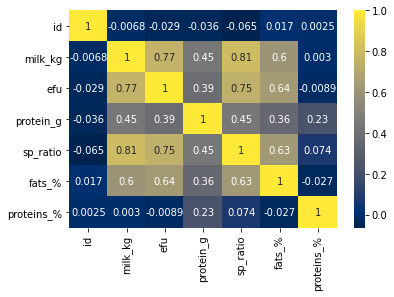

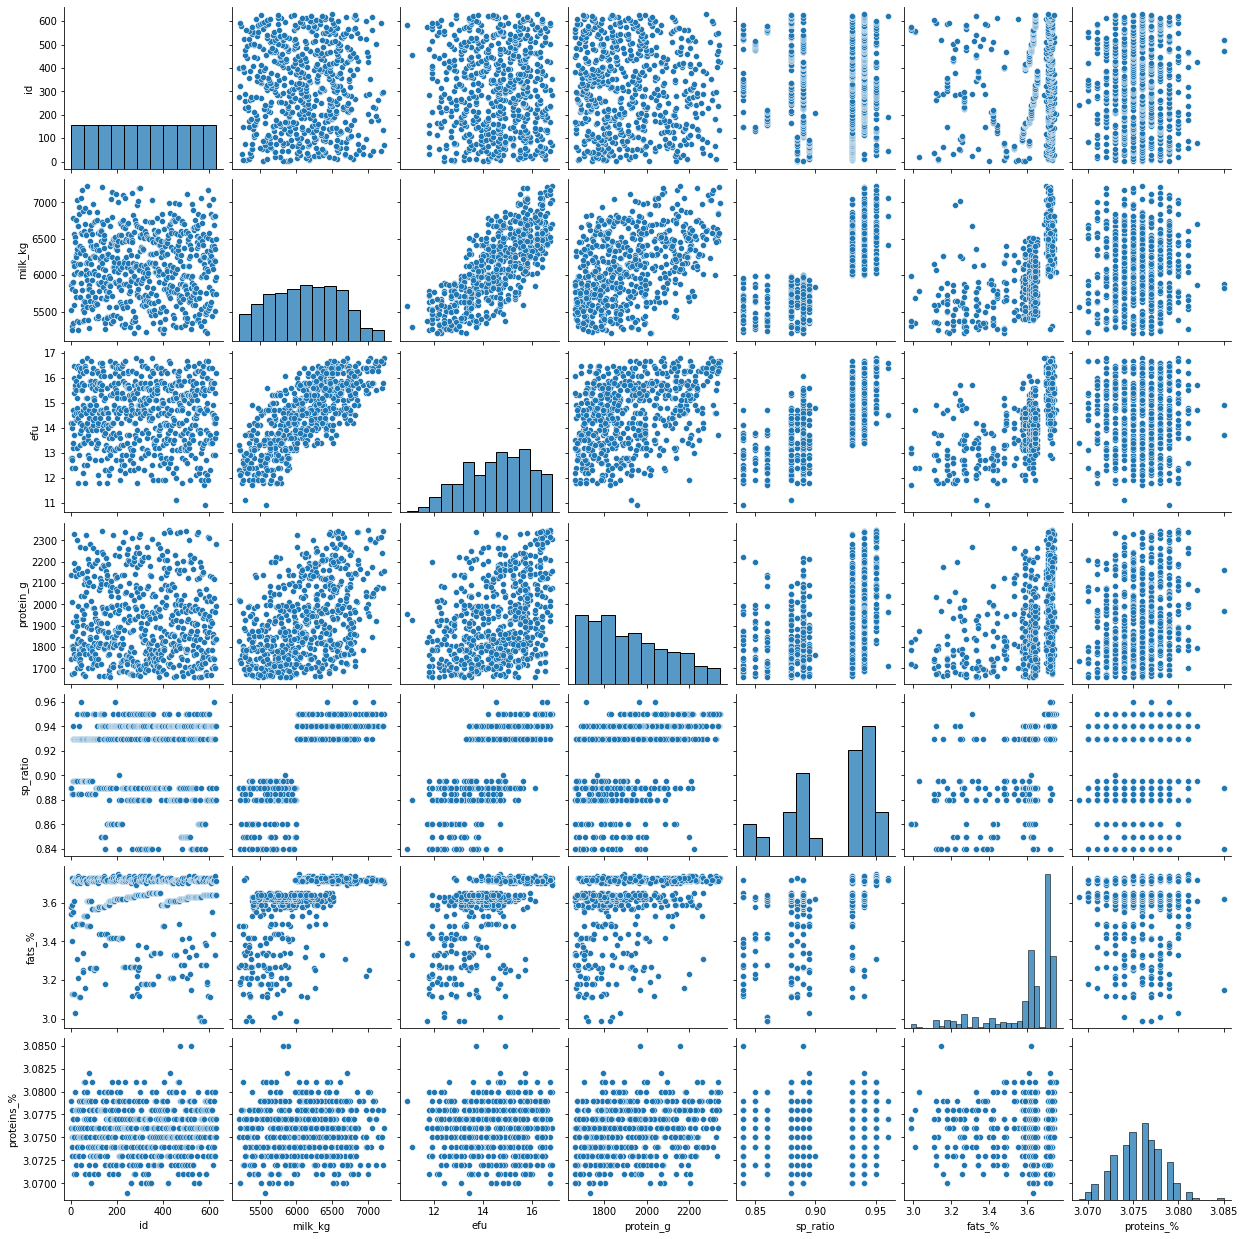

In [7]:
sns.heatmap(df1.corr(), annot=True, cmap='cividis') 
sns.pairplot(df1)

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:


    


    
- выше тобой найдено, что не все количественные признаки имеют нормальное распределение, а  Пирсона (по умолчанию в .corr  считается именно он) мы используем в случае нормальности распределения данных, ведь этот коэффициент чувствителен к отклонениям от нормальности (и к выбросам кстати). В случаи ненормальности в распредлении используем Спирмена       







<div class="alert alert-warning">


Совет: 


- можно поменять политру для удобства восприятия, через добавление cmap='coolwarm' ('bwr', 'seismic'), тогда чем ближе корреляция к 1 тем красней, чем ближе к -1 тем "синей" , ну и чем меньше связи, чем ближе к 0, тем нейтальней цвет. И размер можно увеличить




- к этому времени я бы уже убрал id, ведь это  номер строки и вряд ли он может быть связан с таргетом (если конечно там нет какой то временной составляющей)


Заметим, что целевой признак `milk_kg` имеет следующие зависимости по шкале Чеддока:

* высокую - от параметров `efu` (энергетическая кормовая единица) и `sp_ratio` (сахаро-протеиновое соотношение);
* заметную - от параметра `fats_%` (содержание жиров в молоке);
* умеренную - от параметра `protein_g` (содержание сырого протеина в корме);
* нулевую - от параметра `proteins_%` (содержания белков в молоке).

Наблюдается мультиколлинеарность параметров `efu` и `sp_ratio`: они одинаково коррелируют с остальными параметрами.

---

### Построение диаграмм рассеяния

Построим диаграммы рассеяния. Для параметра `col` логично выбрать парметры `breed` и `age`: возраст и порода коровы, я считаю, являются в большей степени определяющими. Также полезно разным цветом выделить вкус молока - для фермера это тоже без преувеличения "целевой параметр".

Второстепенные диаграммы рассеяния построим на основе `pasture_type` и `daddy_breed`: возможно, обнаружатся заслуживающие внимание закономерности в типах поля и породы родителя. Градацию по вкусу также применим.


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:



Обычно мультиколлинеарность если корреляция больше 0,9


<div class="alert alert-warning">

Совет: 


    
 
- можешь провести дополнительное исследование с помощью    VIF (Variance Inflation Factor)
    
    
    
- и если у нас присутствуют мультиколлинеарность, от неё надо избавляться   




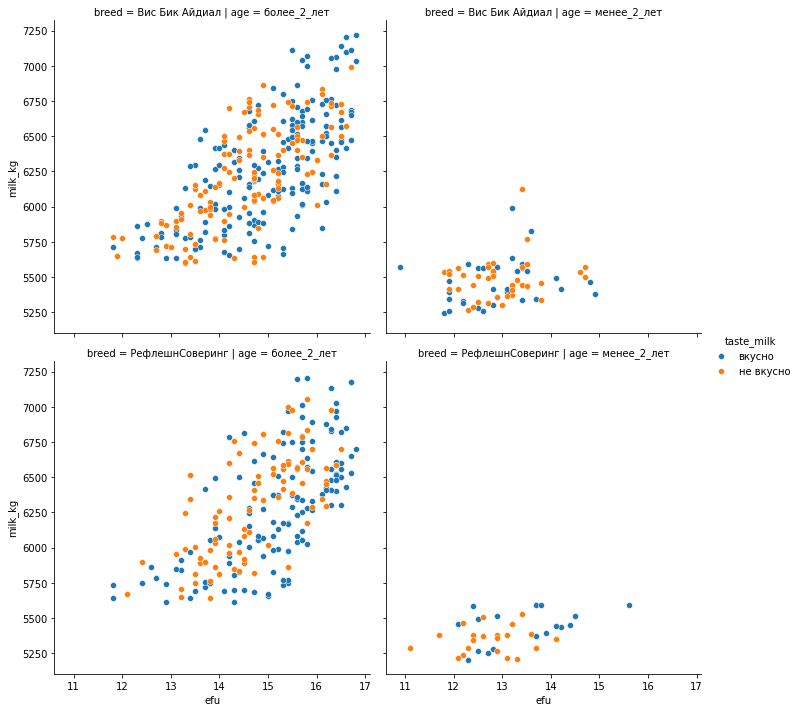

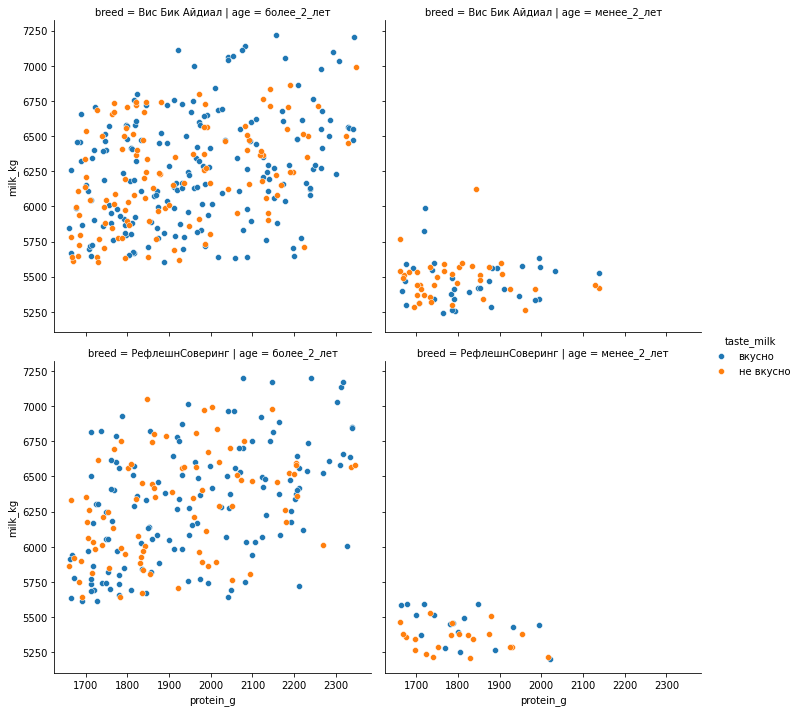

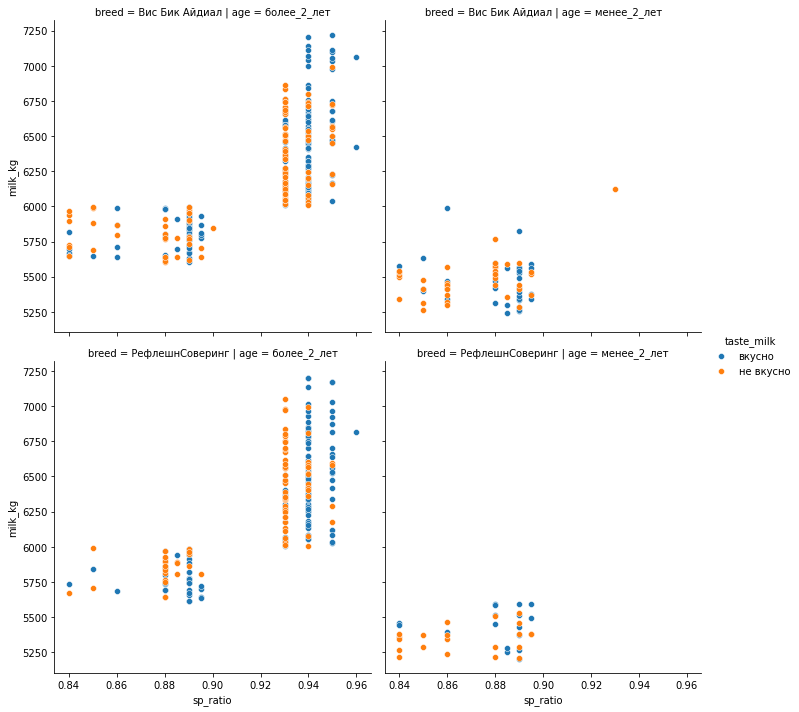

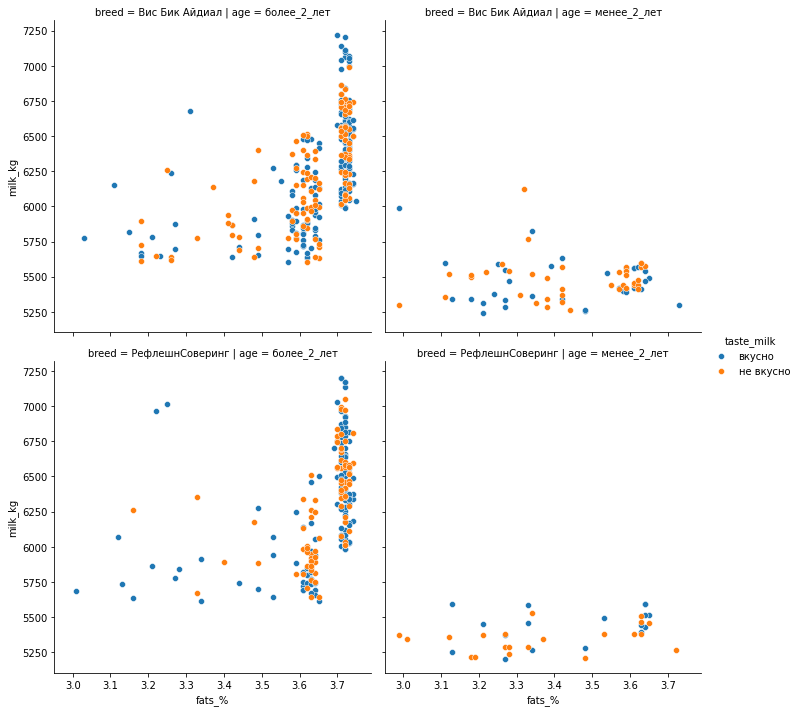

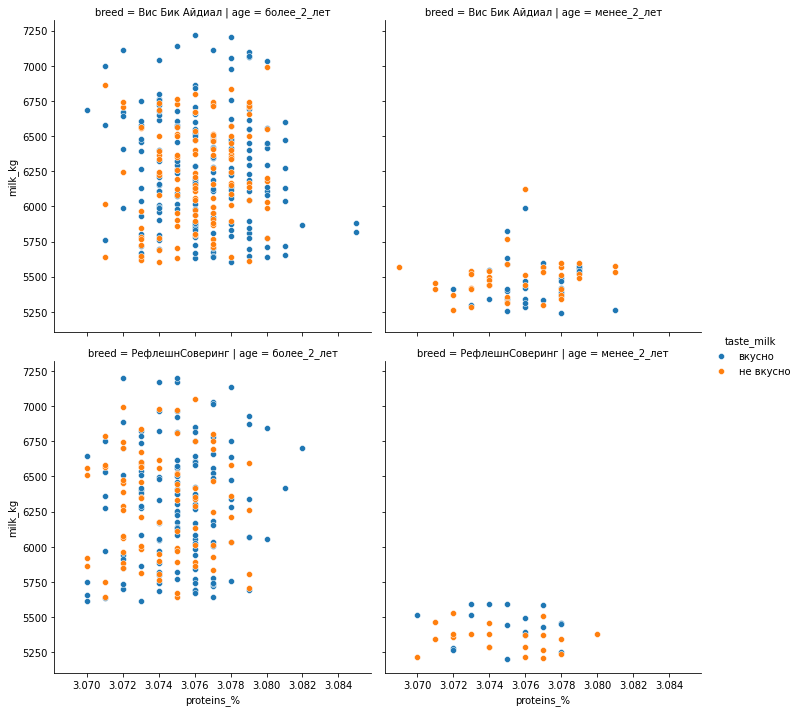

In [8]:
for row in ['efu', 'protein_g', 'sp_ratio', 'fats_%', 'proteins_%']:  
    g = sns.FacetGrid(data=df1, col='age', row='breed', hue='taste_milk', height=5, aspect=1)#, , hue='taste_milk')
    g.map(sns.scatterplot, row, 'milk_kg') 
    g.add_legend()

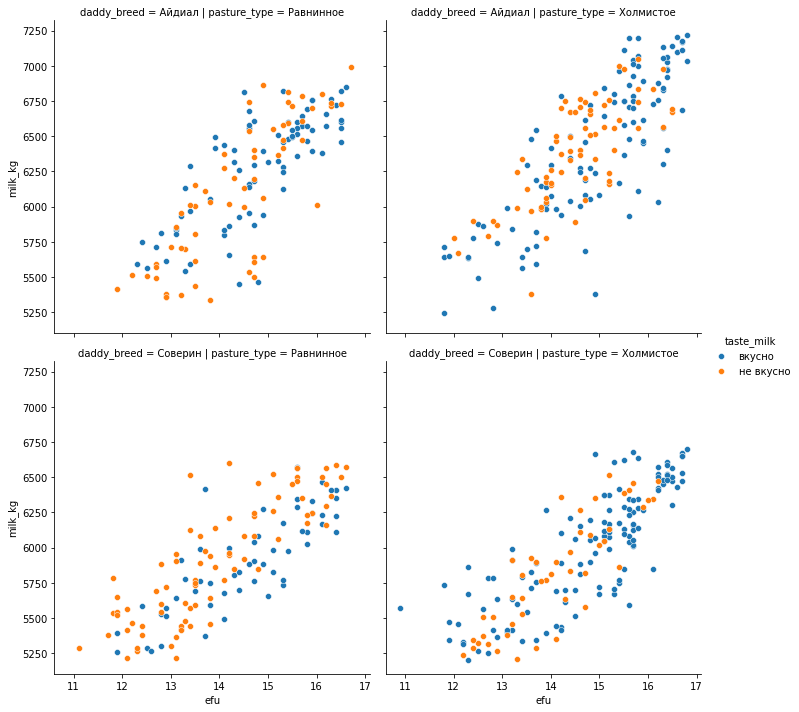

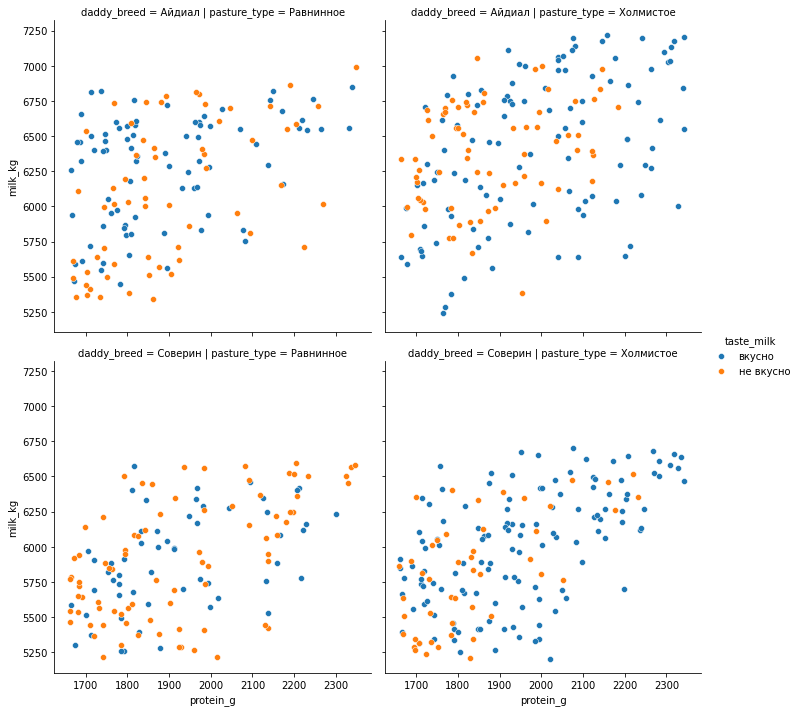

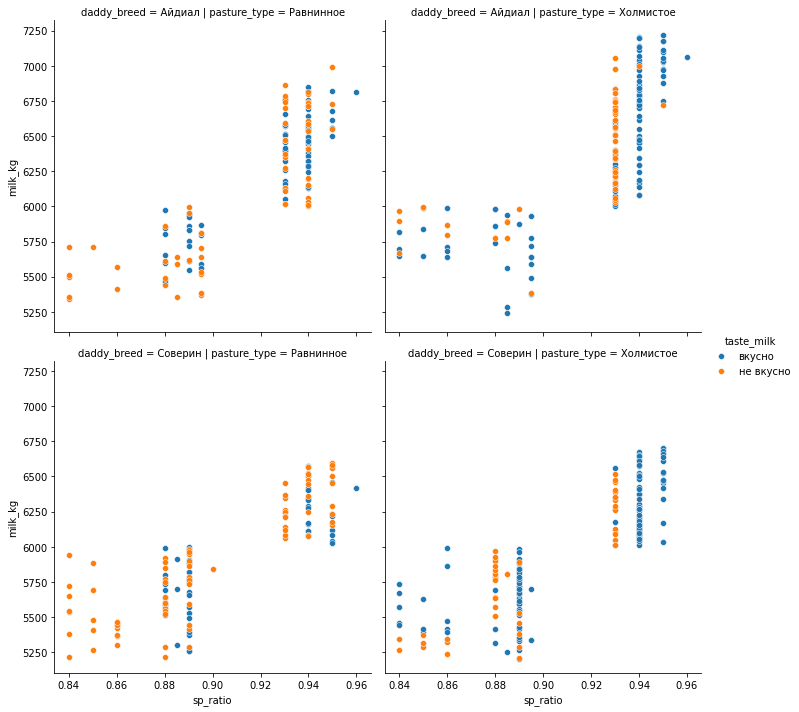

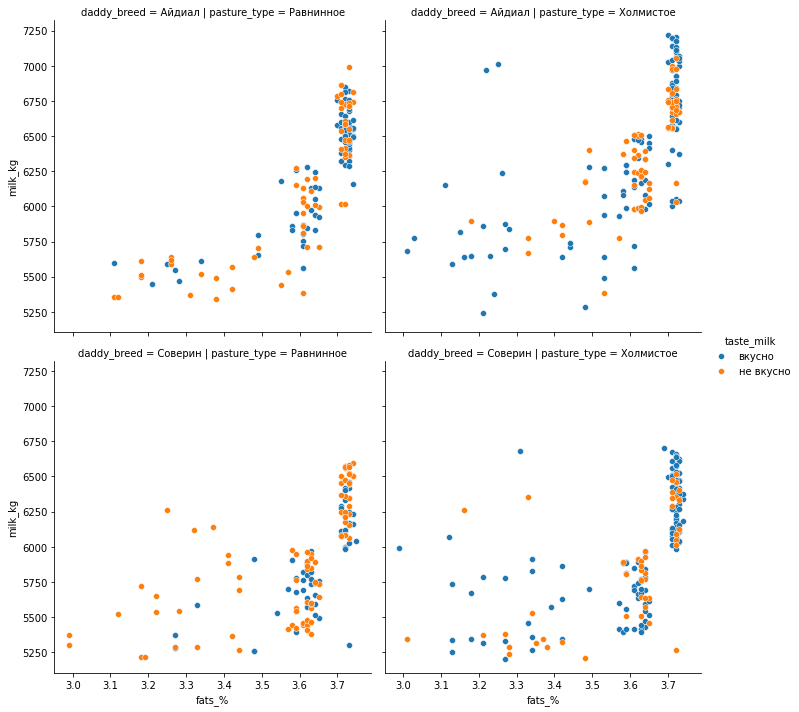

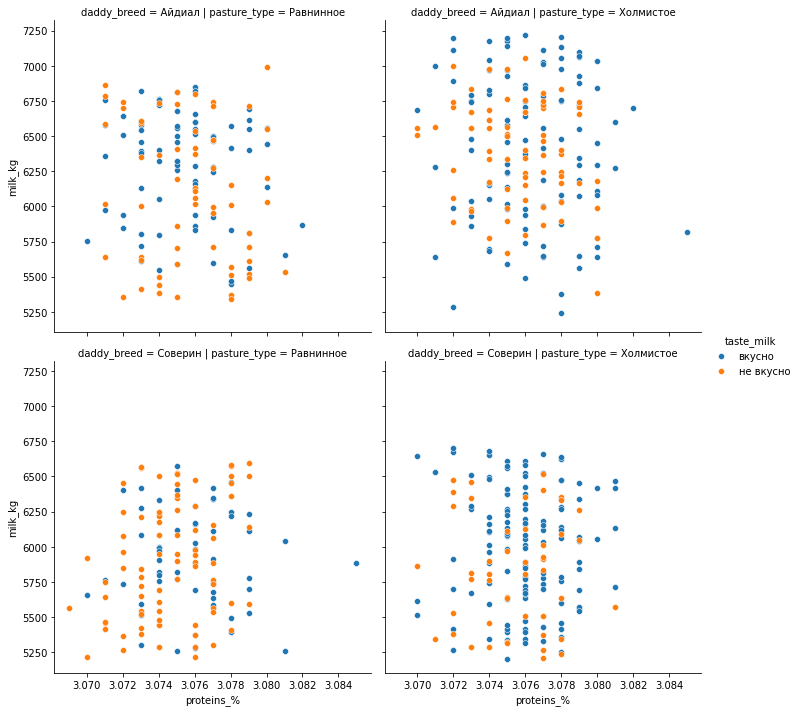

In [9]:
for row in ['efu', 'protein_g', 'sp_ratio', 'fats_%', 'proteins_%']:  
        g = sns.FacetGrid(data=df1, col='pasture_type', row='daddy_breed', hue='taste_milk', height=5, aspect=1)#, , hue='taste_milk')
        g.map(sns.scatterplot, row, 'milk_kg') 
        g.add_legend()

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



- проведен графический анализ взаимосвязей между факторами с использованием scatter plot, теперь у нас более глубокое понимание взаимосвязей в данных



- сделаны выводы относительно нелинейных связей между таргетом "удой" и некоторыми количественными признаками. на основе этой информации мы и сделаем ниже преобразования наших признаков, учитывая выявленные особенности


- графики у тебя отлично оформлены, здорово Что используешь seaborn, pairplot, FacetGrid

<div class="alert alert-warning">


Совет: 



    
    

- чтобы убедиться что ЭКО в квадрате лучше описывает прямая, можно построить scatter plot для  эке в квадрате и наложить прямую регрессию с вычислением r2 





По полученным графикам можно сделать следующие выводы:

* возраст коров сильно влияет на удой коров и вкус молока: средняя масса удоя молока у коров обеих пород моложе 2 лет колеблется в районе 5000-5600 кг, старше 2 лет - в диапазоне 5500-8000 кг! В то же время можно заметить, что у "молодых" коров обеих пород значения вкуса "не вкусное" в основном превалирует над "вкусными" надоями. У старших коров распределение вкуса выглядит более равномерно;

* интересно отметить, что у "молодых" коров обеих пород практически отсутствует зависимость удоя молока от количественных параметров: диапазон массы молока практически стабилен;

* у "старых" коров обеих пород при определённом значении `sp_ratio` (~0,93) появляется большое количество "не вкусных" удоев;

* во второстепенных диаграммах рассеяния вкусовые параметры распределны относительно равномерно. Однако, у замченного ранее определённого значения `sp_ratio` (~0,93) больше "вкусного" молока у коров от быков породы "Айдиал", которые пасутся на равнинном поле;

* зрительно можно предположить, что зависимость параметра `milk_kg` от `fats_%`, `sp_ratio` и `efu` является нелинейной. Оценку целесообразности введения дополнительных параметров для данной зависимости на данный момент дать не могу;

* в остальном прослеживается корреляция, она согласуется с вышеуказанной тепловой картой.

---

### Промежуточные выводы:

Целевой признак `milk_kg` имеет следующие зависимости по шкале Чеддока:

* высокую - от параметров `efu` (энергетическая кормовая единица) и `sp_ratio` (сахаро-протеиновое соотношение);
* заметную - от параметра `fats_%` (содержание жиров в молоке);
* умеренную - от параметра `protein_g` (содержание сырого протеина в корме);
* нулевую - от параметра `proteins_%` (содержания белков в молоке).

Наблюдается мультиколлинеарность параметров `efu` и `sp_ratio`: они одинаково коррелируют с остальными параметрами.

По диаграммам рассеяния можно сделать определённые выводы о зависимости массового удоя и вкусовых качеств молока не только от количественных, но и категориальных признаков (первостепенно - от возраста и породы коров).

Можно предположить, что зависимость параметра `milk_kg` от `fats_%`, `sp_ratio` и `efu` является нелинейной.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



И в конце отличный промежуточный вывод


## Обучение модели линейной регрессии

Создадим и обучим три модели простой линейной регрессии.

Т.к. целевым признаком является удой `milk_kg`, отберём для обучения и прогнозирования следующие параметры:

* `sp_ratio` (сахаро-протеиновое соотношение) и `protein_g` (содержание сырого протеина в корме), тип пастбища `pasture_type` - качество корма является одним из основополагаюших факторов, влияющих на удои. Также немаловажно, где именно паслась корова;

* порода коровы `breed`, возраст `age`, порода папы коровы `daddy_breed` - генетическая составляющая и возраст могут иметь свой вес во влиянии на удои;

* содержание жиров и белков в молоке `fats_%`, `proteins_%`.

Вкус молока `taste_milk`, `id` коровы на удои не влияют.

---

### Формирование исходных массивов данных:

In [10]:
X_1 = df1.drop(['milk_kg', 'taste_milk', 'id'], axis=1).copy()
display(X_1)
y_1 = df1['milk_kg'].copy()
display(y_1)

,efu,protein_g,sp_ratio,breed,pasture_type,daddy_breed,fats_%,proteins_%,age
0,14.2,1743,0.890,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,более_2_лет
1,12.8,2138,0.890,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,менее_2_лет
2,14.0,1854,0.885,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,более_2_лет
3,12.4,2012,0.885,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,более_2_лет
4,12.8,1675,0.885,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,менее_2_лет
...,...,...,...,...,...,...,...,...,...
624,15.4,1964,0.940,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,более_2_лет
625,12.9,1700,0.880,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,менее_2_лет
626,14.4,1837,0.880,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,более_2_лет
627,13.8,1994,0.890,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,более_2_лет


0      5863
1      5529
2      5810
3      5895
4      5302
       ... 
624    6812
625    5513
626    5970
627    5746
628    6503
Name: milk_kg, Length: 628, dtype: int64

### Подготовка данных

Масштабируем количественные признаки с помощью стандартизации и закодируем категориальные признаки для тренировочной и тестовой выборок. Затем объединим подготовленные количественные и категориальные данные в датафрейм.

In [11]:
RANDOM_STATE = 42
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    X_1, 
    y_1, 
    random_state=RANDOM_STATE
) 

print(X_train_1.shape)
print(X_test_1.shape)
print(y_train_1.shape)
print(y_test_1.shape)

cat_col_names_1 = ['breed', 'pasture_type', 'daddy_breed', 'age']
num_col_names_1 = ['efu', 'sp_ratio', 'protein_g', 'fats_%', 'proteins_%']


scaler_1 = StandardScaler()
X_train_scaled_1 = scaler_1.fit_transform(X_train_1[num_col_names_1])
X_test_scaled_1 = scaler_1.transform(X_test_1[num_col_names_1])


encoder_1 = OneHotEncoder(drop='first', sparse=False)
X_train_ohe_1 = encoder_1.fit_transform(X_train_1[cat_col_names_1]) 
X_test_ohe_1 = encoder_1.transform(X_test_1[cat_col_names_1])
encoder_col_names_1 = encoder_1.get_feature_names()


X_train_ohe_1 = pd.DataFrame(X_train_ohe_1, columns=encoder_col_names_1)
X_test_ohe_1 = pd.DataFrame(X_test_ohe_1, columns=encoder_col_names_1)

X_train_scaled_1 = pd.DataFrame(X_train_scaled_1, columns=num_col_names_1)
X_test_scaled_1 = pd.DataFrame(X_test_scaled_1, columns=num_col_names_1)

X_train_1 = pd.concat([X_train_ohe_1, X_train_scaled_1], axis=1)
X_test_1 = pd.concat([X_test_ohe_1, X_test_scaled_1], axis=1)

display(X_train_1)
display(X_test_1)

(471, 9)
(157, 9)
(471,)
(157,)


,x0_РефлешнСоверинг,x1_Холмистое,x2_Соверин,x3_менее_2_лет,efu,sp_ratio,protein_g,fats_%,proteins_%
0,1.0,1.0,1.0,0.0,1.502378,0.837130,1.079523,0.562532,-0.679069
1,1.0,1.0,1.0,1.0,-1.557270,-0.703660,-0.196920,-1.601817,-1.452568
2,0.0,0.0,0.0,0.0,0.125537,-1.011818,-1.386085,-2.563750,1.254677
3,0.0,1.0,0.0,0.0,-0.103937,0.837130,0.752230,0.081565,1.254677
4,0.0,0.0,0.0,0.0,-1.098323,-0.703660,0.828598,0.201807,0.094429
...,...,...,...,...,...,...,...,...,...
466,1.0,1.0,0.0,0.0,-0.639376,-0.549581,1.565008,0.021444,0.481179
467,0.0,0.0,0.0,0.0,0.278519,0.528972,-0.998788,0.682773,-1.065819
468,1.0,0.0,0.0,0.0,-0.868849,-1.011818,-0.818777,0.141686,-1.839317
469,0.0,0.0,0.0,0.0,-1.098323,-1.011818,0.130373,0.021444,-0.292320


,x0_РефлешнСоверинг,x1_Холмистое,x2_Соверин,x3_менее_2_лет,efu,sp_ratio,protein_g,fats_%,proteins_%
0,0.0,1.0,0.0,0.0,-0.486393,-1.011818,-0.813322,0.201807,0.094429
1,1.0,1.0,1.0,0.0,1.425887,0.837130,0.026730,0.622652,-1.065819
2,1.0,1.0,1.0,1.0,-0.486393,-1.628134,-0.682405,0.141686,0.094429
3,0.0,0.0,1.0,0.0,-0.945340,-1.011818,-1.058792,0.081565,-0.679069
4,0.0,1.0,1.0,0.0,0.584484,-0.703660,-1.413360,0.081565,0.094429
...,...,...,...,...,...,...,...,...,...
152,0.0,1.0,0.0,0.0,1.655361,0.528972,0.506760,0.682773,-2.226067
153,1.0,1.0,0.0,0.0,0.660975,0.837130,0.714046,-2.323267,-0.679069
154,0.0,0.0,0.0,0.0,0.584484,0.837130,0.114008,0.201807,0.481179
155,0.0,0.0,0.0,0.0,0.278519,-0.549581,-0.415116,-0.760126,-1.065819


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:




- когда строишь модель для предсказания удоя молока обрати внимание на данные которые ты используешь в качестве признаков.   Всё-таки считается что в этом проекте не нужно включать в  факторы "жирность" и "белок" (и вкус само собой). Они представляют собой характеристики самого молока, которые мы будем учитывать при анализе его качества. То же самое относится к "вкусу молока" — это критерий качества, который не влияет на удой и должен рассматриваться только в следующей модели. Фокусируйся на факторах, которые могут действительно влиять на количество продуцируемого молока, когда много признаков это не всегда хорошо, а когда они некачественные, линейной модели трудно найти стоящие закономрености
    

    

Данные подготовлены для обучения. Построим гистограмму частотного распределения и ящик с усами для количественных признаков, чтобы убедиться в правильности выполнения масштабирования:

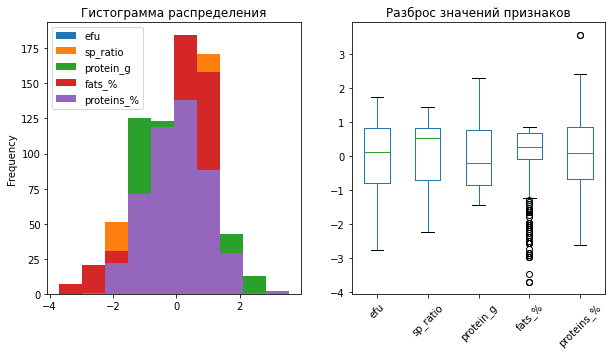

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train_1[num_col_names_1].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train_1[num_col_names_1].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

Распределения выглядят корректно, наблюдаются выбросы в значениях `fats_%` и `proteins_%`.

### Обучение модели

Обучим модель и получим предсказания на тестовой выборке. Посчитаем метрику качества модели R^{2} на тестовых данных, выведем график распределния остатков и диаграмму рассеяния дисперсии.

R2 LinearRegression = 0.79


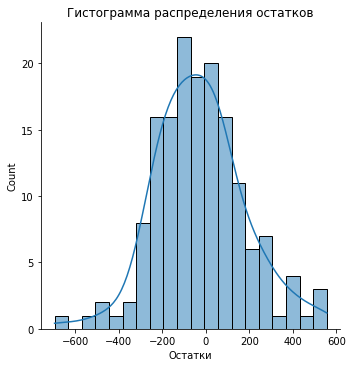

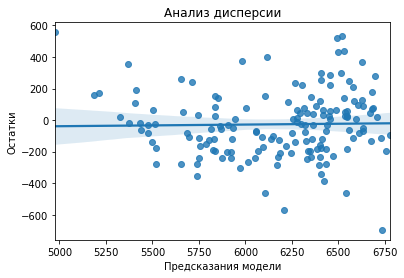

In [13]:
model_lr_1  = LinearRegression()
model_lr_1.fit(X_train_1, y_train_1) 
predictions_1 = model_lr_1.predict(X_test_1)

r2 = r2_score(y_test_1, predictions_1)  
print("R2 LinearRegression =", round(r2, 2))

residuals_1 = y_test_1 - predictions_1

sns.displot(residuals_1, kde=True, multiple='stack', bins=20)
plt.title('Гистограмма распределения остатков')
plt.xlabel('Остатки')
plt.show()

fig, ax = plt.subplots()
sns.regplot(x=predictions_1, y=residuals_1, fit_reg=True)
plt.xlabel('Предсказания модели')
plt.ylabel('Остатки')
plt.title('Анализ дисперсии')
plt.show()


### Промежуточные выводы:
 
* значение R² модели составляет 0,79;
* анализ остатков показывает нормальное распределение со смещением влево на -66, наблюдается наличие "выбросов" (около -700, -500, 300, 400, 600). Анализ дисперсии показывает наличие "рупора".

Исходя из вышеперечисленного, для улучшения качества модели **необходимо найти и добавить в модель дополнительные признаки, а также обработать нелинейниые зависимости.**


    
<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:

    
    
- есть графический анализ остатков и вывод о недостаточной гомоскедастичности на месте     
     
    

### Подготовка данных с учётом связи входных признаков с целевым

`sp_ratio` и `milk_kg` связаны нелинейно. На их диаграмме рассеяния наблюдения сгруппированы в два кластера, причём есть такое значение `sp_ratio`, которое можно считать границей между кластерами (0,9). Чтобы устранить нелинейность, преобразуем `sp_ratio` в категориальный бинарный признак, использовав эту границу.

`efu` и `milk_kg` связаны нелинейно. Нелинейность между ними можно исключить, если ввести новый признак `efu_square` (т.е., возвести признак в квадрат).

In [14]:
X_2 = df1.drop(['milk_kg', 'taste_milk', 'id'], axis=1).copy()
X_2['efu'] = X_2['efu']**2
X_2['sp_ratio'] = X_2['sp_ratio'].apply(lambda x: True if x > 0.9 else False)
X_2.rename(columns={'efu': 'efu_square', 'sp_ratio': 'sp_ratio_bool'}, inplace=True)
display(X_2)

y_2 = df1['milk_kg'].copy()
display(y_2)

,efu_square,protein_g,sp_ratio_bool,breed,pasture_type,daddy_breed,fats_%,proteins_%,age
0,201.64,1743,False,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,более_2_лет
1,163.84,2138,False,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,менее_2_лет
2,196.00,1854,False,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,более_2_лет
3,153.76,2012,False,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,более_2_лет
4,163.84,1675,False,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,менее_2_лет
...,...,...,...,...,...,...,...,...,...
624,237.16,1964,True,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,более_2_лет
625,166.41,1700,False,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,менее_2_лет
626,207.36,1837,False,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,более_2_лет
627,190.44,1994,False,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,более_2_лет


0      5863
1      5529
2      5810
3      5895
4      5302
       ... 
624    6812
625    5513
626    5970
627    5746
628    6503
Name: milk_kg, Length: 628, dtype: int64


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:

    
- лучше границу провести по 0.915, так она будет ровно посередине между двумя кластерами.  А у тебя она прижата к одному кластеру. Есть даже такая модель SVM, rоторая реализует идею  проведения границы так чтобы нам была [равноудалена от разных классов](https://yandex.ru/images/search?img_url=https%3A%2F%2Fi.ytimg.com%2Fvi%2F9z4hdalU31U%2Fmaxresdefault.jpg%3F7857057827&lr=213&nomisspell=1&noreask=1&pos=0&relev=new_family_filter_disable%3D1&rpt=simage&snip=exps%3Dimg_exp_text_ranker%3Ddummy_passage_ranker&source=qa&srcskip=IMAGESQUICK&stype=image&text=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%20%D0%BE%D0%BF%D0%BE%D1%80%D0%BD%D1%8B%D1%85%20%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%BE%D0%B2)    

   

In [15]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_2, 
    y_2, 
    random_state=RANDOM_STATE
) 

print(X_train_2.shape)
print(X_test_2.shape)
print(y_train_2.shape)
print(y_test_2.shape)

cat_col_names_2 = ['breed', 'sp_ratio_bool', 'pasture_type', 'daddy_breed', 'age']
num_col_names_2 = ['efu_square', 'protein_g', 'fats_%', 'proteins_%']


scaler_2 = StandardScaler()
X_train_scaled_2 = scaler_2.fit_transform(X_train_2[num_col_names_2])
X_test_scaled_2 = scaler_2.transform(X_test_2[num_col_names_2])


encoder_2 = OneHotEncoder(drop='first', sparse=False)
X_train_ohe_2 = encoder_2.fit_transform(X_train_2[cat_col_names_2]) 
X_test_ohe_2 = encoder_2.transform(X_test_2[cat_col_names_2])
encoder_col_names_2 = encoder_2.get_feature_names()


X_train_ohe_2 = pd.DataFrame(X_train_ohe_2, columns=encoder_col_names_2)
X_test_ohe_2 = pd.DataFrame(X_test_ohe_2, columns=encoder_col_names_2)

X_train_scaled_2 = pd.DataFrame(X_train_scaled_2, columns=num_col_names_2)
X_test_scaled_2 = pd.DataFrame(X_test_scaled_2, columns=num_col_names_2)

X_train_2 = pd.concat([X_train_ohe_2, X_train_scaled_2], axis=1)
X_test_2 = pd.concat([X_test_ohe_2, X_test_scaled_2], axis=1)

display(X_train_2)
display(X_test_2)

(471, 9)
(157, 9)
(471,)
(157,)


,x0_РефлешнСоверинг,x1_True,x2_Холмистое,x3_Соверин,x4_менее_2_лет,efu_square,protein_g,fats_%,proteins_%
0,1.0,1.0,1.0,1.0,0.0,1.577968,1.079523,0.562532,-0.679069
1,1.0,0.0,1.0,1.0,1.0,-1.511438,-0.196920,-1.601817,-1.452568
2,0.0,0.0,0.0,0.0,0.0,0.082269,-1.386085,-2.563750,1.254677
3,0.0,1.0,1.0,0.0,0.0,-0.150235,0.752230,0.081565,1.254677
4,0.0,0.0,0.0,0.0,0.0,-1.102358,0.828598,0.201807,0.094429
...,...,...,...,...,...,...,...,...,...
466,1.0,0.0,1.0,0.0,0.0,-0.674102,1.565008,0.021444,0.481179
467,0.0,1.0,0.0,0.0,0.0,0.239936,-0.998788,0.682773,-1.065819
468,1.0,0.0,0.0,0.0,0.0,-0.890627,-0.818777,0.141686,-1.839317
469,0.0,0.0,0.0,0.0,0.0,-1.102358,0.130373,0.021444,-0.292320


,x0_РефлешнСоверинг,x1_True,x2_Холмистое,x3_Соверин,x4_менее_2_лет,efu_square,protein_g,fats_%,proteins_%
0,0.0,0.0,1.0,0.0,0.0,-0.527089,-0.813322,0.201807,0.094429
1,1.0,1.0,1.0,1.0,0.0,1.490346,0.026730,0.622652,-1.065819
2,1.0,0.0,1.0,1.0,1.0,-0.527089,-0.682405,0.141686,0.094429
3,0.0,0.0,0.0,1.0,0.0,-0.961737,-1.058792,0.081565,-0.679069
4,0.0,0.0,1.0,1.0,0.0,0.561660,-1.413360,0.081565,0.094429
...,...,...,...,...,...,...,...,...,...
152,0.0,1.0,1.0,0.0,0.0,1.754809,0.506760,0.682773,-2.226067
153,1.0,1.0,1.0,0.0,0.0,0.643423,0.714046,-2.323267,-0.679069
154,0.0,1.0,0.0,0.0,0.0,0.561660,0.114008,0.201807,0.481179
155,0.0,0.0,0.0,0.0,0.0,0.239936,-0.415116,-0.760126,-1.065819


### Обучение обновлённой модели

Обучим обновлённую модель и получим предсказания на тестовой выборке. Посчитаем метрику качества модели R^{2} на тестовых данных, выведем график распределния остатков и диаграмму рассеяния дисперсии.

R2 LinearRegression = 0.82


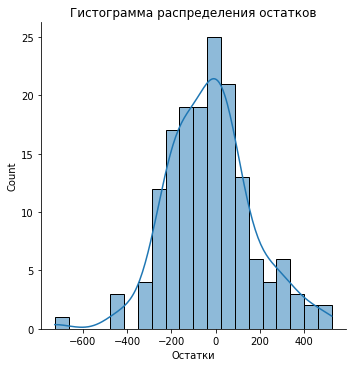

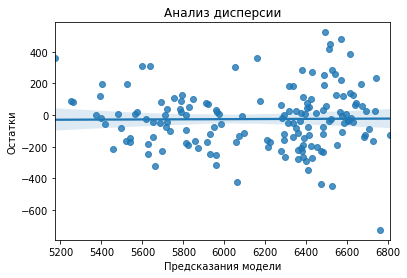

In [16]:
model_lr_2  = LinearRegression()
model_lr_2.fit(X_train_2, y_train_2) 
predictions_2 = model_lr_2.predict(X_test_2)

r2 = r2_score(y_test_2, predictions_2)  
print("R2 LinearRegression =", round(r2, 2))

residuals_2 = y_test_2 - predictions_2

sns.displot(residuals_2, kde=True, multiple='stack', bins=20)
plt.title('Гистограмма распределения остатков')
plt.xlabel('Остатки')
plt.show()

fig, ax = plt.subplots()
sns.regplot(x=predictions_2, y=residuals_2, fit_reg=True)
plt.xlabel('Предсказания модели')
plt.ylabel('Остатки')
plt.title('Анализ дисперсии')
plt.show()

### Промежуточные выводы:
 
* значение R² модели составляет 0,82;
* анализ остатков показывает нормальное распределение, **смещение отсутствует, количество "выбросов" снизилось** (около -700, 300). Анализ дисперсии также показывает наличие "рупора".

Исходя из вышеперечисленного, для улучшения качества модели **необходимо найти и добавить в модель дополнительные признаки.**

### Подготовка данных с учётом добавления в модель дополнительного признака

Добавим признак `daddy_name` из второго датафрейма, соединив его с остальными данными. Устраним нелинейность между признаками.

In [17]:
X_3 = df1.drop(['milk_kg', 'taste_milk'], axis=1).copy()
X_3['efu'] = X_3['efu']**2
X_3['sp_ratio'] = X_3['sp_ratio'].apply(lambda x: True if x > 0.9 else False)
X_3.rename(columns={'efu': 'efu_square', 'sp_ratio': 'sp_ratio_bool'}, inplace=True)
X_3 = X_3.merge(df2, on='id', how='left')
X_3.drop(columns='id', inplace=True)
display(X_3)

y_3 = df1['milk_kg'].copy()
display(y_3)

,efu_square,protein_g,sp_ratio_bool,breed,pasture_type,daddy_breed,fats_%,proteins_%,age,daddy_name
0,201.64,1743,False,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,более_2_лет,Буйный
1,163.84,2138,False,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,менее_2_лет,Соловчик
2,196.00,1854,False,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,более_2_лет,Барин
3,153.76,2012,False,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,более_2_лет,Буйный
4,163.84,1675,False,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,менее_2_лет,Барин
...,...,...,...,...,...,...,...,...,...,...
623,237.16,1964,True,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,более_2_лет,Буйный
624,166.41,1700,False,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,менее_2_лет,Барин
625,207.36,1837,False,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,более_2_лет,Барин
626,190.44,1994,False,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,более_2_лет,Барин


0      5863
1      5529
2      5810
3      5895
4      5302
       ... 
624    6812
625    5513
626    5970
627    5746
628    6503
Name: milk_kg, Length: 628, dtype: int64

### Обучение обновлённой модели

Обучим обновлённую модель и получим предсказания на тестовой выборке. Посчитаем метрику качества модели R^{2} на тестовых данных, выведем график распределния остатков и диаграмму рассеяния дисперсии.

In [18]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(
    X_3, 
    y_3, 
    random_state=RANDOM_STATE
) 

print(X_train_3.shape)
print(X_test_3.shape)
print(y_train_3.shape)
print(y_test_3.shape)

cat_col_names_3 = ['breed', 'sp_ratio_bool', 'pasture_type', 'daddy_breed', 'age', 'daddy_name']
num_col_names_3 = ['efu_square', 'protein_g', 'fats_%', 'proteins_%']


scaler_3 = StandardScaler()
X_train_scaled_3 = scaler_3.fit_transform(X_train_3[num_col_names_3])
X_test_scaled_3 = scaler_3.transform(X_test_3[num_col_names_3])


encoder_3 = OneHotEncoder(drop='first', sparse=False)
X_train_ohe_3 = encoder_3.fit_transform(X_train_3[cat_col_names_3]) 
X_test_ohe_3 = encoder_3.transform(X_test_3[cat_col_names_3])
encoder_col_names_3 = encoder_3.get_feature_names()


X_train_ohe_3 = pd.DataFrame(X_train_ohe_3, columns=encoder_col_names_3)
X_test_ohe_3 = pd.DataFrame(X_test_ohe_3, columns=encoder_col_names_3)

X_train_scaled_3 = pd.DataFrame(X_train_scaled_3, columns=num_col_names_3)
X_test_scaled_3 = pd.DataFrame(X_test_scaled_3, columns=num_col_names_3)

X_train_3 = pd.concat([X_train_ohe_3, X_train_scaled_3], axis=1)
X_test_3 = pd.concat([X_test_ohe_3, X_test_scaled_3], axis=1)

display(X_train_3)
display(X_test_3)

(471, 10)
(157, 10)
(471,)
(157,)


,x0_РефлешнСоверинг,x1_True,x2_Холмистое,x3_Соверин,x4_менее_2_лет,x5_Буйный,x5_Геркулес,x5_Соловчик,efu_square,protein_g,fats_%,proteins_%
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.577968,1.079523,0.562532,-0.679069
1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,-1.511438,-0.196920,-1.601817,-1.452568
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.082269,-1.386085,-2.563750,1.254677
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.150235,0.752230,0.081565,1.254677
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.102358,0.828598,0.201807,0.094429
...,...,...,...,...,...,...,...,...,...,...,...,...
466,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.674102,1.565008,0.021444,0.481179
467,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.239936,-0.998788,0.682773,-1.065819
468,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.890627,-0.818777,0.141686,-1.839317
469,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.102358,0.130373,0.021444,-0.292320


,x0_РефлешнСоверинг,x1_True,x2_Холмистое,x3_Соверин,x4_менее_2_лет,x5_Буйный,x5_Геркулес,x5_Соловчик,efu_square,protein_g,fats_%,proteins_%
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.527089,-0.813322,0.201807,0.094429
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.490346,0.026730,0.622652,-1.065819
2,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,-0.527089,-0.682405,0.141686,0.094429
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.961737,-1.058792,0.081565,-0.679069
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.561660,-1.413360,0.081565,0.094429
...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.754809,0.506760,0.682773,-2.226067
153,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.643423,0.714046,-2.323267,-0.679069
154,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.561660,0.114008,0.201807,0.481179
155,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.239936,-0.415116,-0.760126,-1.065819


R2 LinearRegression = 0.82


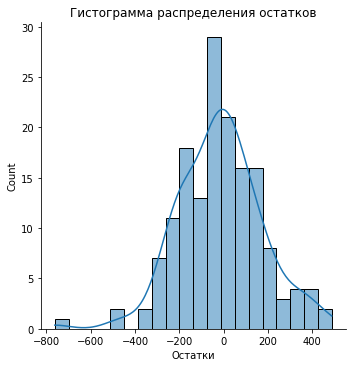

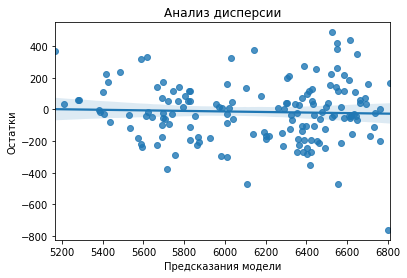

In [19]:
model_lr_3  = LinearRegression()
model_lr_3.fit(X_train_3, y_train_3) 
predictions_3 = model_lr_3.predict(X_test_3)

r2 = r2_score(y_test_3, predictions_3)  
print("R2 LinearRegression =", round(r2, 2))

residuals_3 = y_test_3 - predictions_3

sns.displot(residuals_3, kde=True, multiple='stack', bins=20)
plt.title('Гистограмма распределения остатков')
plt.xlabel('Остатки')
plt.show()

fig, ax = plt.subplots()
sns.regplot(x=predictions_3, y=residuals_3, fit_reg=True)
plt.xlabel('Предсказания модели')
plt.ylabel('Остатки')
plt.title('Анализ дисперсии')
plt.show()

### Промежуточные выводы:
 
* значение R² модели составляет 0,82;
* анализ остатков показывает нормальное распределение, **смещение отсутствует, но количество "выбросов" увеличилось** (около -700, -500, -200, 400). В то же время анализ дисперсии показывает **смещение "рупора" в сторону нормальной дисперсии.**

Исходя из вышеперечисленного, для определения лучшей модели **необходимо найти и сравнить их дополнительные метрики.**

---

### Оценка метрик моделей

Оценим качество каждой модели по трём метрикам (MSE, RMSE, MAE):

In [20]:
tuples_list = [(y_test_1, predictions_1), (y_test_2, predictions_2), (y_test_3, predictions_3)]
i = 1
for tuple in tuples_list:
    test, pred = tuple
    print('Модель', i)
    i += 1
    print('RMSE:', round(mean_squared_error(test, pred, squared = False), 2))
    print('MSE:', round(mean_squared_error(test, pred), 2))
    print('MAE:', round(mean_absolute_error(test, pred), 2))
    print()

pred = pd.Series(data=predictions_3)
print('Доверительный интервал от 2,5% до 97,5%:')
print(round(pred.quantile(0.025), 2))
print(round(pred.quantile(0.975), 2))

Модель 1
RMSE: 207.72
MSE: 43146.8
MAE: 161.78

Модель 2
RMSE: 192.04
MSE: 36879.43
MAE: 146.69

Модель 3
RMSE: 189.2
MSE: 35794.87
MAE: 144.78

Доверительный интервал от 2,5% до 97,5%:
5374.94
6739.1



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:

    
    
- необходимые метрики подсчитаны. Какой-то универсальный метрики нет, поэтому всегда лучше использовать набор
    
    
- Доверительный интервал на месте    


    
<div class="alert alert-warning">


    
    
Совет 🤔:

    
 
    
    
насколько удобнее было бы использовать  фунцию, ведь это будет очень удобно -  во все метрики мы подаём одни и те же два аргумента, вот и отличная возможность сделать наш код лаконичней: один раз пишем функцию, а затем одной строчкой её вызываем, для всех наших моделей    
    


Могу дать парочку cоветов по оформлению функций
    
    
- Для таких простых функций острой необходимости нет, код говорит сам за себя, но если хочешь попрактиковаться, можешь включить строку документации [docstring](https://dzen.ru/a/Yw02qy-7BGdhFhN3?utm_referer=yandex.ru).  Можно оставить описание того что делает эта функция, а затем попробовать вызвать что та напишешь с помощью
    
    
    print(my_function.__doc__)
    
или    
    
    help(my_function)


    
Это станет полезно, когда проблемой станет не написание кода, а проблема "как бы не запутаться в том что понаписал"  
    
    
    
    
- Код создания функции обычно оставляет под импортами, так их легче контролировать


    
        

### Промежуточные выводы:

Анализ метрик показывает, что лучшей моделью является третья. Её доверительный интервал при доверительной вероятности 95% находится на отрезке [5374.94; 6739.1].

---

### Испытание лучшей модели

С помощью третьей модели спрогнозируем удой коров, которых фермер хочет купить. Добавим недостающие признаки `ЭКЕ (Энергетическая кормовая единица)`, `Сырой протеин, г` и `СПО (Сахаро-протеиновое соотношение)`: возьмём из датасета `ferma_main.csv` средние значения каждого из признаков и увеличьте их на 5%. Выполним подготовку данных, аналогичную той, которую делали для тренировочной выборки.


    
<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:

 

- прекрасно, так мы наглядно увидели как с помощью преобразования признаков, которые нелинейно связан с целевой, мы можем устранить  недостатки линейной модели, подняв метрику. А затем, добавив дополнительный признак - имя отца, поднять качество прогноза ещё выше. До этого была сделана предобработка данных (убраны выбросы + дубликаты, что тоже помогло модели лучше обучиться),  а будь у нас мультиколлинеарность, можно было заняться и ею. Такого рода работа, самая сложная и важная часть в машинном обучении,  мы еще можем поднимать качество прогноза с помощью подбора гиперпараметров и подбора лучшей модели для данного дтасета, но это уже гораздо проще и там нет уже какой то творческой работы 

     

<div class="alert alert-warning">




Совет 🤔:



- Хорошо бы сюда добавить как модель оценивает важность того или иного признака, это может быть отличной иллюстрацией того насколько удачно мы сгенерировали новые признаки. Это можно сделать с помощью [.feature_importance](https://inria.github.io/scikit-learn-mooc/python_scripts/dev_features_importance.html). А ещё есть такая интересная библиотека shap — позволяет детально изучить работу модели, в том числе оценить важность признаков, при этом не привязана к работе конкретного алгортима прогнозирования. Вот статья с описанием ее работы — https://habr.com/ru/articles/428213/ и детальный разбор графиков - https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137  . Подробнее об этой библиотеке будет следующим проекте






In [21]:
for col in ['efu', 'protein_g', 'sp_ratio']:
    df3[col] = round(df1[col].mean() + df1[col].mean() * 0.05, 2)

display(df3)

,breed,pasture_type,daddy_breed,daddy_name,fats_%,proteins_%,age,efu,protein_g,sp_ratio
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.28,2019.95,0.96
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.28,2019.95,0.96
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.28,2019.95,0.96
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.28,2019.95,0.96
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.28,2019.95,0.96
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.28,2019.95,0.96
6,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.28,2019.95,0.96
7,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.28,2019.95,0.96
8,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.28,2019.95,0.96
9,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,15.28,2019.95,0.96


In [22]:
X_test = df3.copy()

X_test['efu'] = X_test['efu']**2
X_test['sp_ratio'] = X_test['sp_ratio'].apply(lambda x: True if x > 0.9 else False)
X_test.rename(columns={'efu': 'efu_square', 'sp_ratio': 'sp_ratio_bool'}, inplace=True)
X_test['pasture_type'] = X_test['pasture_type'].apply(lambda x: 'Холмистое' if x == 'холмистое' else 'Равнинное')

display(X_test)

,breed,pasture_type,daddy_breed,daddy_name,fats_%,proteins_%,age,efu_square,protein_g,sp_ratio_bool
0,Вис Бик Айдиал,Холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,233.4784,2019.95,True
1,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,233.4784,2019.95,True
2,РефлешнСоверинг,Равнинное,Соверин,Барин,3.59,3.074,более_2_лет,233.4784,2019.95,True
3,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,233.4784,2019.95,True
4,РефлешнСоверинг,Равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,233.4784,2019.95,True
5,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,233.4784,2019.95,True
6,Вис Бик Айдиал,Равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,233.4784,2019.95,True
7,РефлешнСоверинг,Холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,233.4784,2019.95,True
8,Вис Бик Айдиал,Холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,233.4784,2019.95,True
9,РефлешнСоверинг,Равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,233.4784,2019.95,True


Подготовка данных:

In [23]:
cat_col_names = ['breed', 'sp_ratio_bool', 'pasture_type', 'daddy_breed', 'age', 'daddy_name']
num_col_names = ['efu_square', 'protein_g', 'fats_%', 'proteins_%']


X_test_scaled = scaler_3.transform(X_test[num_col_names])

X_test_ohe = encoder_3.transform(X_test[cat_col_names])
encoder_col_names = encoder_3.get_feature_names()

X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

display(X_test)

,x0_РефлешнСоверинг,x1_True,x2_Холмистое,x3_Соверин,x4_менее_2_лет,x5_Буйный,x5_Геркулес,x5_Соловчик,efu_square,protein_g,fats_%,proteins_%
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.545371,0.517397,-0.158918,0.094429
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.545371,0.517397,-0.399401,2.028176
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.545371,0.517397,-0.098797,-0.679069
3,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.545371,0.517397,-1.241093,-5.706810
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.545371,0.517397,0.201807,-0.679069
5,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.545371,0.517397,0.141686,-8.800805
6,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.545371,0.517397,-0.219039,1.254677
7,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.545371,0.517397,-1.241093,1.254677
8,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.545371,0.517397,0.742894,-8.027306
9,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.545371,0.517397,0.742894,-1.065819



    
<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



- Тут  ошибаются, обучая  scaler и encoder  на cow_buy. У тебя всё верно, используешь scaler и encoder обученные на train  (Можешь объяснить почему делаем именно так?)
   

Прогноз удоя коров:

In [24]:
predictions = model_lr_3.predict(X_test)

predictions = pd.Series(data=predictions)
df3['predictions_milk_kg'] = round(predictions, 2)
display(df3)

,breed,pasture_type,daddy_breed,daddy_name,fats_%,proteins_%,age,efu,protein_g,sp_ratio,predictions
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.28,2019.95,0.96,6598.79
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.28,2019.95,0.96,6311.92
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.28,2019.95,0.96,6264.96
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.28,2019.95,0.96,6691.21
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.28,2019.95,0.96,6541.56
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.28,2019.95,0.96,6636.23
6,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.28,2019.95,0.96,6515.21
7,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.28,2019.95,0.96,6330.40
8,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.28,2019.95,0.96,6571.36
9,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,15.28,2019.95,0.96,6628.61


### Промежуточные выводы:

Оценка качества каждой модели на тестовых данных по метрикам R^2, MSE, RMSE, MAE показала, что лучше всего прогноз по удою даёт модель №3. 

Анализ остатков показывает нормальное распределение, **смещение отсутствует, но количество "выбросов" увеличилось** (около -700, -500, -200, 400). В то же время анализ дисперсии показывает **смещение "рупора" в сторону нормальной дисперсии.**

На основе модели был сделан прогноз по удою.

## Обучение модели логистической регрессии

Подготовим данные датасета `ferma_main.csv` и обучим на них модель `LogisticRegression`. Целевой признак - вкус молока.

In [25]:
X_4 = df1.drop(['milk_kg', 'taste_milk'], axis=1).copy()
X_4['efu'] = X_4['efu']**2
X_4['sp_ratio'] = X_4['sp_ratio'].apply(lambda x: True if x > 0.9 else False)
X_4.rename(columns={'efu': 'efu_square', 'sp_ratio': 'sp_ratio_bool'}, inplace=True)
X_4 = X_4.merge(df2, on='id', how='left')
X_4.drop(columns='id', inplace=True)
display(X_4)

y_4 = df1['taste_milk'].copy()
display(y_4)


,efu_square,protein_g,sp_ratio_bool,breed,pasture_type,daddy_breed,fats_%,proteins_%,age,daddy_name
0,201.64,1743,False,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.076,более_2_лет,Буйный
1,163.84,2138,False,Вис Бик Айдиал,Равнинное,Соверин,3.54,3.079,менее_2_лет,Соловчик
2,196.00,1854,False,РефлешнСоверинг,Холмистое,Соверин,3.59,3.074,более_2_лет,Барин
3,153.76,2012,False,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.075,более_2_лет,Буйный
4,163.84,1675,False,Вис Бик Айдиал,Равнинное,Соверин,3.73,3.073,менее_2_лет,Барин
...,...,...,...,...,...,...,...,...,...,...
623,237.16,1964,True,РефлешнСоверинг,Равнинное,Айдиал,3.74,3.075,более_2_лет,Буйный
624,166.41,1700,False,РефлешнСоверинг,Равнинное,Соверин,3.64,3.073,менее_2_лет,Барин
625,207.36,1837,False,РефлешнСоверинг,Холмистое,Соверин,3.64,3.075,более_2_лет,Барин
626,190.44,1994,False,РефлешнСоверинг,Равнинное,Соверин,3.64,3.077,более_2_лет,Барин


0         вкусно
1         вкусно
2      не вкусно
3      не вкусно
4         вкусно
         ...    
624    не вкусно
625       вкусно
626    не вкусно
627       вкусно
628       вкусно
Name: taste_milk, Length: 628, dtype: object

In [26]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(
    X_4, 
    y_4, 
    random_state=RANDOM_STATE
) 

print(X_train_4.shape)
print(X_test_4.shape)
print(y_train_4.shape)
print(y_test_4.shape)

cat_col_names_4 = ['breed', 'sp_ratio_bool', 'pasture_type', 'daddy_breed', 'age', 'daddy_name']
num_col_names_4 = ['efu_square', 'protein_g', 'fats_%', 'proteins_%']


scaler_4 = StandardScaler()
X_train_scaled_4 = scaler_4.fit_transform(X_train_4[num_col_names_4])
X_test_scaled_4 = scaler_4.transform(X_test_4[num_col_names_4])

encoder_4 = OneHotEncoder(drop='first', sparse=False)
X_train_ohe_4 = encoder_4.fit_transform(X_train_4[cat_col_names_4]) 
X_test_ohe_4 = encoder_4.transform(X_test_4[cat_col_names_4])
encoder_col_names_4 = encoder_4.get_feature_names()

y_train_4 = y_train_4.apply(lambda x: 1 if x == 'вкусно' else 0)
y_test_4 = y_test_4.apply(lambda x: 1 if x == 'вкусно' else 0)

X_train_ohe_4 = pd.DataFrame(X_train_ohe_4, columns=encoder_col_names_4)
X_test_ohe_4 = pd.DataFrame(X_test_ohe_4, columns=encoder_col_names_4)

X_train_scaled_4 = pd.DataFrame(X_train_scaled_4, columns=num_col_names_4)
X_test_scaled_4 = pd.DataFrame(X_test_scaled_4, columns=num_col_names_4)

X_train_4 = pd.concat([X_train_ohe_4, X_train_scaled_4], axis=1)
X_test_4 = pd.concat([X_test_ohe_4, X_test_scaled_4], axis=1)

display(X_train_4)
display(X_test_4)
display(y_train_4)
display(y_test_4)

(471, 10)
(157, 10)
(471,)
(157,)


,x0_РефлешнСоверинг,x1_True,x2_Холмистое,x3_Соверин,x4_менее_2_лет,x5_Буйный,x5_Геркулес,x5_Соловчик,efu_square,protein_g,fats_%,proteins_%
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.577968,1.079523,0.562532,-0.679069
1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,-1.511438,-0.196920,-1.601817,-1.452568
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.082269,-1.386085,-2.563750,1.254677
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.150235,0.752230,0.081565,1.254677
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.102358,0.828598,0.201807,0.094429
...,...,...,...,...,...,...,...,...,...,...,...,...
466,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.674102,1.565008,0.021444,0.481179
467,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.239936,-0.998788,0.682773,-1.065819
468,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.890627,-0.818777,0.141686,-1.839317
469,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.102358,0.130373,0.021444,-0.292320


,x0_РефлешнСоверинг,x1_True,x2_Холмистое,x3_Соверин,x4_менее_2_лет,x5_Буйный,x5_Геркулес,x5_Соловчик,efu_square,protein_g,fats_%,proteins_%
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.527089,-0.813322,0.201807,0.094429
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.490346,0.026730,0.622652,-1.065819
2,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,-0.527089,-0.682405,0.141686,0.094429
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.961737,-1.058792,0.081565,-0.679069
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.561660,-1.413360,0.081565,0.094429
...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.754809,0.506760,0.682773,-2.226067
153,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.643423,0.714046,-2.323267,-0.679069
154,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.561660,0.114008,0.201807,0.481179
155,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.239936,-0.415116,-0.760126,-1.065819


508    1
383    1
587    0
197    1
328    1
      ..
72     1
107    1
271    1
436    0
103    0
Name: taste_milk, Length: 471, dtype: int64

582    1
592    1
551    1
214    0
486    1
      ..
84     1
285    1
577    1
80     0
24     0
Name: taste_milk, Length: 157, dtype: int64

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


Тут признаки выбраны корректно
    




<div class="alert alert-warning">



Совет: 









- обрати внимание на аргумент stratify, он позволит сохранить изначальное распределение таргетов во всех новых датасетах.  Существующий дисбаланс никуда не денется, но в каждом датасете он будет одинаковым. [Почитать](https://pythonru.com/baza-znanij/sklearn-train-test-split) можно тут




### Обучение логистической модели

In [27]:
clf = OneVsRestClassifier(LogisticRegression())

clf = clf.fit(X_train_4, y_train_4)
y_pred_4 = clf.predict(X_test_4)

print('Веса коэффициентов:')
for feature_number, feature_name in enumerate(X_4.columns):
    exp_weight = math.exp(clf.coef_[0, feature_number])
    print(f"{feature_name:<20}: {exp_weight:+.2f}")

Веса коэффициентов:
efu_square          : +1.04
protein_g           : +0.49
sp_ratio_bool       : +1.65
breed               : +0.96
pasture_type        : +0.82
daddy_breed         : +0.91
fats_%              : +0.90
proteins_%          : +0.65
age                 : +1.85
daddy_name          : +1.19


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26). If you observe this warning while using RFE or SelectFromModel, use the importance_getter parameter instead.
  warnings.warn(msg, category=FutureWarning)





<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



- Действительно интересно посмотреть как именно признаки влияют на Таргет

    
- И здорово что учтено отношение шансов (odds ratio) 
    





<div class="alert alert-warning">
    
    



Совет 🤔:


    
- а зачем OneVsRestClassifier?    
    

### Оценка метрик модели

Построим тепловую карту матрицы ошибок, рассчитаем метрики accuracy, recall, precision:

Аккуратность модели: 0.63
recall:  0.86
precision:  0.62


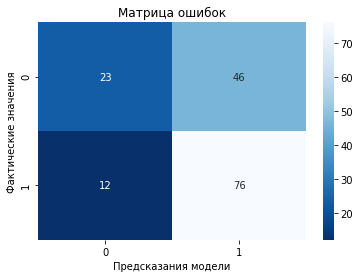

In [93]:
cm = confusion_matrix(y_test_4, y_pred_4)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок')
plt.ylabel('Фактические значения')
plt.xlabel('Предсказания модели')

acc = accuracy_score(y_test_4, y_pred_4)
recall = recall_score(y_test_4, y_pred_4)
precision = precision_score(y_test_4, y_pred_4)

print('Аккуратность модели:', round(acc, 2))
print('recall: ',round(recall ,2))
print('precision: ',round(precision,2))

### Промежуточные выводы:

* Аккуратность модели составляет 63%;
* больше ошибок модель совершает, присваивая значения FP (False Positive), значения метрики `recall` (учёт ложноотрицательных прогнозов) гораздо выше.

Т.к. для фермера критично, чтобы молоко было вкусное, **необходимо откалибровать модель таким образом, чтобы свести ошибки FP к минимальным значениям.**

---

### Калибровка модели

In [60]:
y_proba_4 = clf.predict_proba(X_test_4)[:,1]

data = pd.DataFrame(zip(y_test_4, y_proba_4),
             columns = ['y_test_4', 'y_proba_4']).sort_values(by='y_proba_4',ascending=False)

print(data.head()) 

thresholds = [round(i,2) for i in np.linspace(0.1,1,num = 4,endpoint=False)]
print()
print(thresholds) 
print()

for i in thresholds:
    data['y_pred_4_'+str(i)] = data['y_proba_4'].apply(lambda x: 1 if x >= i else 0) # ваш код здесь)
    precision = precision_score(y_test_4, data['y_pred_4_'+str(i)])
    print('precision y_pred_4_'+str(i), ' ', round(precision,2))

display(data.sample(5))

     y_test_4  y_proba_4
85          1   0.861369
110         1   0.842813
66          1   0.841492
51          1   0.839685
8           1   0.817310

[0.1, 0.32, 0.55, 0.78]

precision y_pred_4_0.1   0.56
precision y_pred_4_0.32   0.56
precision y_pred_4_0.55   0.57
precision y_pred_4_0.78   0.81


,y_test_4,y_proba_4,y_pred_4_0.1,y_pred_4_0.32,y_pred_4_0.55,y_pred_4_0.78
76,0,0.521144,1,1,0,0
49,0,0.449278,1,1,0,0
121,1,0.692041,1,1,1,0
116,0,0.793792,1,1,1,1
120,0,0.603669,1,1,1,0


Заметим, что значение метрики `precision` увеличивается со сдвигом порога к единице. Исследуем диапазон сдвига свыше 0,78:

In [34]:
thresholds = [round(i,2) for i in np.linspace(0.78,0.86,num = 4,endpoint=False)]
print()
print(thresholds) 
print()

for i in thresholds:
    data['y_pred_4_'+str(i)] = data['y_proba_4'].apply(lambda x: 1 if x >= i else 0) # ваш код здесь)
    precision = precision_score(y_test_4, data['y_pred_4_'+str(i)])
    print('precision y_pred_4_'+str(i), ' ', round(precision,2))

display(data.sample(5))



[0.78, 0.8, 0.82, 0.84]

precision y_pred_4_0.78   0.81
precision y_pred_4_0.8   0.78
precision y_pred_4_0.82   0.75
precision y_pred_4_0.84   1.0


,y_test_4,y_proba_4,y_pred_4_0.1,y_pred_4_0.32,y_pred_4_0.55,y_pred_4_0.78,y_pred_4_0.8,y_pred_4_0.82,y_pred_4_0.84
63,0,0.569017,1,1,1,0,0,0,0
85,1,0.861369,1,1,1,1,1,1,1
139,1,0.643924,1,1,1,0,0,0,0
91,1,0.645682,1,1,1,0,0,0,0
33,0,0.676816,1,1,1,0,0,0,0




<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:


    
- найдено верное решение для минимизации риска плохого прогноза (стараемся занулить FP, поднимая presicion)  с помощью манипуляции порогом    
    

<div class="alert alert-warning">



Совет 🤔:



- а ведь порог стоит начать подбирать как минимум с 0.5 (можешь это обосновать?)



- вместо перебора по циклу можно было использовать precision_recall_curve, который возвращает три значения: precisions, recalls, thresholds 



- и почему бы не построить красивый график метрик для разных значений threshold







    





Оптимальное значение порога — 0.84 — при нём количество ложноположительных ошибок равно нулю. 

### Оценка метрик откалиброванной модели

Посчитаем метрики и аккуратность, выведем матрицу ошибок:

Аккуратность модели: 0.46
recall:  0.03
precision:  1.0


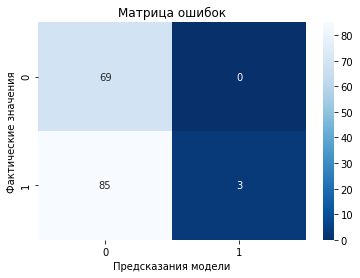

In [33]:
cm = confusion_matrix(y_test_4, data['y_pred_4_0.84'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title('Матрица ошибок')
plt.ylabel('Фактические значения')
plt.xlabel('Предсказания модели')

acc = accuracy_score(y_test_4, data['y_pred_4_0.84'])
recall = recall_score(y_test_4, data['y_pred_4_0.84'])
precision = precision_score(y_test_4, data['y_pred_4_0.84'])

print('Аккуратность модели:', round(acc, 2))
print('recall: ',round(recall ,2))
print('precision: ',round(precision,2))

Стоит обратить внимание на тот факт, что выросло количество ложноотрицательных ошибок: с 12 до 85. Также снизилась общая аккуратность модели с 63% до 46%. Возможно, в погоне за вкусным молоком фермер рискует пропустить большое количество подходящих коров. 

---

### Испытание модели

С помощью обученной модели спрогнозируем вкус молока коров, которых фермер хочет купить. Используем ранее подготовленный датафрейм `X_test`:

In [92]:
predictions = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(predictions, y_proba), columns = ['predictions', 'y_proba'])

data['y_pred_4_0.84'] = data['y_proba'].apply(lambda x: 1 if x >= 0.75 else 0)

display(data)

,predictions,y_proba,y_pred_4_0.84
0,1,0.708442,0
1,1,0.660295,0
2,1,0.571970,0
3,0,0.363824,0
4,1,0.556276,0
5,0,0.104354,0
6,1,0.659900,0
7,1,0.742421,0
8,0,0.166179,0
9,1,0.516608,0


### Промежуточные выводы:

* Аккуратность модели составляет 63%;
* больше ошибок модель совершает, присваивая значения FP (False Positive).

Т.к. для фермера критично, чтобы молоко было вкусное, **необходимо откалибровать модель таким образом, чтобы свести ошибки FP к минимальным значениям.**

После калибровки модели необходимо учесть, что по прогнозу **ни одна корова не даст вкусное молоко**.

## Итоговые выводы для фермера:

Выведем итоговый датафрейм с прогнозами удоев и вкуса молока по каждой корове:

In [91]:
df3['predictions_tasty_milk'] = data['predictions']
df3['predictions_tasty_milk_calibr'] = data['y_pred_4_0.84']
display(df3)

,breed,pasture_type,daddy_breed,daddy_name,fats_%,proteins_%,age,efu,protein_g,sp_ratio,predictions,predictions_tasty_milk,predictions_tasty_milk_calibr
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.076,более_2_лет,15.28,2019.95,0.96,6598.79,1,0
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.081,менее_2_лет,15.28,2019.95,0.96,6311.92,1,0
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.074,более_2_лет,15.28,2019.95,0.96,6264.96,1,0
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.061,более_2_лет,15.28,2019.95,0.96,6691.21,0,0
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.074,более_2_лет,15.28,2019.95,0.96,6541.56,1,0
5,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.63,3.053,менее_2_лет,15.28,2019.95,0.96,6636.23,0,0
6,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.57,3.079,более_2_лет,15.28,2019.95,0.96,6515.21,1,0
7,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.079,менее_2_лет,15.28,2019.95,0.96,6330.40,1,0
8,Вис Бик Айдиал,холмистое,Соверин,Соловчик,3.73,3.055,более_2_лет,15.28,2019.95,0.96,6571.36,0,0
9,РефлешнСоверинг,равнинное,Соверин,Геркулес,3.73,3.073,более_2_лет,15.28,2019.95,0.96,6628.61,1,0


**Удой каждой коровы прогнозируется свыше 6000 кг. По неоткалиброванной можели вкусное молоко будет у коров 0,1,2,4,6,7,8,11,13. По откалиброванной для исключения FP-ошибок - ни у одной из коров не будет вкусного молока.**

Если результат не устраивает фермера, можно снизить вкусовой порог с учётом увеличения рисков купить неподходящую корову.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


    Если результат не устраивает фермера, можно снизить вкусовой порог с учётом увеличения рисков купить неподходящую корову
    
    
Так давай оставим эти рекомендации, пусть и с  пониженным порогом    


## Окончательные выводы по проекту:

**Описание проекта:**
Заказчик этого исследования — фермер, владелец молочного хозяйства «Вольный луг». 
Необходимо разработать модели машинного обучения, которые помогут ему управлять рисками и принимать объективное решение о покупке бурёнок, чтобы расширить поголовье стада коров:

* Первая будет прогнозировать возможный удой коровы;
* Вторая — рассчитывать вероятность получить вкусное молоко от коровы.

**Исходные данные:**
В нащем распоряжении три датасета.

Файл ferma_main.csv содержит данные о стаде фермера на текущий момент. Описание данных:

    id — уникальный идентификатор коровы.
    Удой, кг — масса молока, которую корова даёт в год (в килограммах).
    ЭКЕ (Энергетическая кормовая единица) — показатель питательности корма коровы.
    Сырой протеин, г — содержание сырого протеина в корме (в граммах).
    СПО (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
    Порода — порода коровы.
    Тип пастбища — ландшафт лугов, на которых паслась корова.
    порода папы_быка — порода папы коровы.
    Жирность,% — содержание жиров в молоке (в процентах).
    Белок,% — содержание белков в молоке (в процентах).
    Вкус молока — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
    Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

Файл ferma_dad.csv хранит имя папы каждой коровы в стаде фермера. Описание данных:

    id — уникальный идентификатор коровы.
    Имя Папы — имя папы коровы.

Файл cow_buy.csv — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:

    Порода — порода коровы.
    Тип пастбища — ландшафт лугов, на которых паслась корова.
    порода папы_быка — порода папы коровы.
    Имя_папы — имя папы коровы.
    Текущая_жирность,% — содержание жиров в молоке (в процентах).
    Текущий_уровень_белок,% — содержание белков в молоке (в процентах).
    Возраст — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

**В ходе предобработки исходных данных было сделано:**

* переименованы столбцы в корректную форму;
* проверены данные на наличие полных дубликатов;
* проверены данные на наличие пропусков;
* изменён тип данных там, где это необходимо;
* исправлены неявные дубликаты.

Первый датафрейм:

* В столбце `milk_kg` обнаружено аномальное значение. Предположительно, была допущена ошибка при вводе данных; 
* В столбцах `efu`, `protein_g`, `sp_ratio`, `fats_%` наблюдаются локальные выбросы. Вероятно, это связано со спецификой состава молока и корма, т.к. общее распределение данных выглядит корректно;
* В столбце `proteins_%` наблюдается нормальное распределение.

Во втором датафрейме количественных данных нет.

Третий датафрейм:

На первый взгляд, данные выглядят некорректно, т.к. нормального распределения не наблюдается. Однако, выборка слишком мала, поэтому "выбросы" сильно искажают её. К тому же функции агрегирования практически совпадают с данными первого датафрейма.


**Были созданы и обучены три модели простой линейной регрессии.**


Т.к. целевым признаком является удой `milk_kg`, для обучения и прогнозирования были отобраны следующие параметры:

* `sp_ratio` (сахаро-протеиновое соотношение) и `protein_g` (содержание сырого протеина в корме), тип пастбища `pasture_type` - качество корма является одним из основополагаюших факторов, влияющих на удои. Также немаловажно, где именно паслась корова;

* порода коровы `breed`, возраст `age`, порода папы коровы `daddy_breed` - генетическая составляющая и возраст могут иметь свой вес во влиянии на удои;

* содержание жиров и белков в молоке `fats_%`, `proteins_%`.

Вкус молока `taste_milk`, `id` коровы на удои не влияют.

Количественные признаки были отмасштабированы, категориальные - закодированы.

После тестирования исходной модели были сделаны выводы:

* значение R² модели составляет 0,79;
* анализ остатков показывает нормальное распределение со смещением влево на -66, наблюдается наличие "выбросов" (около -700, -500, 300, 400, 600). Анализ дисперсии показывает наличие "рупора".

Исходя из вышеперечисленного, для улучшения качества модели **необходимо было найти и добавить в модель дополнительные признаки, а также обработать нелинейниые зависимости.**

Нелинейные зависимости были обработаны следующим образом:

`sp_ratio` и `milk_kg` связаны нелинейно. На их диаграмме рассеяния наблюдения сгруппированы в два кластера, причём есть такое значение `sp_ratio`, которое можно считать границей между кластерами (0,9). Чтобы устранить нелинейность, `sp_ratio` преобразован в категориальный бинарный признак, по этой границе.

`efu` и `milk_kg` связаны нелинейно. Нелинейность между ними можно исключить, если ввести новый признак `efu_square` (т.е., возвести признак в квадрат).

Также был добавлен признак `daddy_name` из второго датафрейма.

Анализ итоговой модели показал:

* значение R² составляет 0,82;
* анализ остатков показывает нормальное распределение, **смещение отсутствует, но количество "выбросов" увеличилось** (около -700, -500, -200, 400). В то же время анализ дисперсии показывает **смещение "рупора" в сторону нормальной дисперсии.**

Исходя из вышеперечисленного, для определения лучшей модели **необходимо найти и сравнить их дополнительные метрики.**

Оценка качества каждой модели на тестовых данных по метрикам R^2, MSE, RMSE, MAE показала, что лучше всего прогноз по удою даёт модель №3.

*Возможно, для увеличения качества модели можно исключить мультиколлинеарные признаки.*

**На основе модели №3 был сделан прогноз по удою.**

**Для прогнозирования вкуса молока была создана логистическая модель.** В ходе испытания были сделаны следующие выводы:

* Аккуратность модели составляет 63%;
* метрика `precision` (учёт ложноположительных прогнозов) - больше ошибок модель совершает, присваивая значения FP (False Positive), значения метрики `recall` (учёт ложноотрицательных прогнозов) гораздо выше.

Т.к. для фермера критично, чтобы молоко было вкусное, **необходимо было откалибровать модель таким образом, чтобы свести ошибки FP к минимальным значениям.**

Значение метрики `precision` увеличивается со сдвигом порога к единице. Опытным путём подобрано оптимальное значение порога — 0.84 — при нём количество ложноположительных ошибок равно нулю. 

**Стоит обратить внимание** на тот факт, что выросло количество ложноотрицательных ошибок: с 12 до 85. Также снизилась общая аккуратность модели с 63% до 46%. Возможно, в погоне за вкусным молоком фермер рискует пропустить большое количество подходящих коров. 

**С помощью обученной модели спрогнозировали вкус молока коров, которых фермер хочет купить.**
После калибровки модели необходимо учесть, что по прогнозу **ни одна корова не даст вкусное молоко**.

Итоговое заключение для фермера:

**Удой каждой коровы прогнозируется свыше 6000 кг. По неоткалиброванной можели вкусное молоко будет у коров 0,1,2,4,6,7,8,11,13. По откалиброванной для исключения FP-ошибок - ни у одной из коров не будет вкусного молока.**

Если результат не устраивает фермера, можно снизить вкусовой порог с учётом увеличения рисков купить неподходящую корову.




<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:


Вячеслав, здорово что в конце расписаны все этапы работы. Это важно потому что когда проект захочет посмотреть будущий работодатель (или начальник), у него может не быть времени на подробный разбор кода. Вероятнее всего он бегло просмотрит код, а из общего вывода захочет получить представление о всей работе.





<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>


Вячеслав, у тебя старательно выполненная работа, все четко, осмысленно. Очень подробные выводы, графики отлично оформлены, здорово Что используешь библиотеку seaborn, код подробно прокомментирован, функции присутствуют. Проект конечно очень непростой с точки зрения обьема.  Теперь первый проект касающийся непосредственно машинного обучения стал гораздо насыщенней, теперь как раньше мы не ограничиваемся перебором лучших гиперпараметров, а можем увидеть как работать с признаками (что на самом деле и составляет большую часть работы дата-сантиста) и как с помощью этого мы можем нивелировать те или иные недостатки той или иной модели и добиться лучшего результата

    

    

Я оставил небольшие советы и вопросики (если есть время и желание можешь воспользоваться/ответить)
    


Обязательное к исправлению:





- не указан  decimal, а данные стоит сразу привести  к коректному виду

    
    
    
- предпочтительно  использование как гистограммы, так и ящика с усами в анализе колличественных данных, и не забываем строить графики для категориальных 

    
    
- нет у нас мультиколлинеарности    
    
    
 
- не забываем что Пирсона используем только если количественный признак распределён нормально

    
    
    

    
- нелогично использовать жирность и белок для прогноза у удоя (а вот сырой протеин добавить стоит)    

    
    
    
- и всё-таки какие-то рекомендации минимизирующие риск оставить нужно (можно попробовать обучить модель на других признаках, чтобы прогноз на тесте и на реальных данных были более похожи, либо снизить порог, предположив что в данных много шума изза чего порог с тестовой не получилось использовать на реальных данных)

    
    
    
Жду исправлений, для принятия проекта. Если какие то вопросы, то сразу спрашивай ) 
    